In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

### <font color='deepred'>I. Read and Explore Data</font>

In [2]:

column_names = [
    'age', 'class_of_worker', 'detailed_industry_recode', 'detailed_occupation_recode',
    'education', 'wage_per_hour', 'enroll_in_edu_last_wk', 'marital_stat',
    'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin',
    'sex', 'member_of_labor_union', 'reason_for_unemployment', 'full_or_part_time_stat',
    'capital_gains', 'capital_losses', 'dividends_from_stocks', 'tax_filer_stat',
    'region_prev_residence', 'state_prev_residence', 'household_family_stat', 'household_summary',
    'instance_weight',  # To remove 
    'msa_change_code', 'reg_change_code', 'move_within_reg', 'live_in_this_house_1_year_ago',
    'prev_residence_sunbelt', 'num_persons_worked_for_employer', 'family_members_under_18',
    'country_birth_father', 'country_birth_mother', 'country_birth_self', 'citizenship',
    'own_business_or_self_employed', 'veterans_admin_questionnaire', 'veterans_benefits',
    'weeks_worked_in_year', 'year', 'income'
]

# Read data
train_df = pd.read_csv("Data/census_income_learn.csv", header=None, index_col=False, names=column_names)
test_df = pd.read_csv("Data/census_income_test.csv", header=None, index_col=False, names=column_names)

# Suppression of instance_weight
train_df.drop(columns=["instance_weight"], inplace=True)
test_df.drop(columns=["instance_weight"], inplace=True)

# Distribution
print('Train:\n', train_df['income'].value_counts())
print('-'*30,'\nTest:\n', test_df['income'].value_counts())


Train:
 income
- 50000.    187141
50000+.      12382
Name: count, dtype: int64
------------------------------ 
Test:
 income
- 50000.    93576
50000+.      6186
Name: count, dtype: int64


#### Analyse NANs
Analyse unique values to filter NAN and group them

In [3]:
# Analyse categorical variables
cat_cols = train_df.select_dtypes(include='object').columns

# Print unique values
for col in cat_cols:
    print(f"\n🔹 Column : {col}")
    uniques = train_df[col].unique()
    print(f"Nb of unique values : {len(uniques)}")
    print(f"Values : {uniques}")


🔹 Column : class_of_worker
Nb of unique values : 9
Values : [' Not in universe' ' Self-employed-not incorporated' ' Private'
 ' Local government' ' Federal government' ' Self-employed-incorporated'
 ' State government' ' Never worked' ' Without pay']

🔹 Column : education
Nb of unique values : 17
Values : [' High school graduate' ' Some college but no degree' ' 10th grade'
 ' Children' ' Bachelors degree(BA AB BS)'
 ' Masters degree(MA MS MEng MEd MSW MBA)' ' Less than 1st grade'
 ' Associates degree-academic program' ' 7th and 8th grade'
 ' 12th grade no diploma' ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' 11th grade' ' Doctorate degree(PhD EdD)' ' 9th grade'
 ' 1st 2nd 3rd or 4th grade']

🔹 Column : enroll_in_edu_last_wk
Nb of unique values : 3
Values : [' Not in universe' ' High school' ' College or university']

🔹 Column : marital_stat
Nb of unique values : 7
Values : [' Widowed' ' Divorced' ' Never married'
 ' Married-c

#### Fill NA

In [7]:
# List of non-informative values (treated as missing)
MISSING_VALUES = [
    '?',
    'Not in universe',
    'Not identifiable',
    'NA',
    'Do not know'
]

# Clean and normalize string columns (strip whitespace)
for col in train_df.select_dtypes(include='object').columns:
    train_df[col] = train_df[col].str.strip()
    test_df[col] = test_df[col].str.strip()

# Replace non-informative values with NaN
train_df.replace(MISSING_VALUES, np.nan, inplace=True)
test_df.replace(MISSING_VALUES, np.nan, inplace=True)

# Summarize missing values per column
missing_counts = train_df.isna().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

missing_percentages = (train_df.isna().mean() * 100).round(2)
missing_percentages = missing_percentages[missing_percentages > 0].sort_values(ascending=False)
# Display summary
print("\n🧾 Missing values summary (percentage):\n")
print(missing_percentages)



🧾 Missing values summary (percentage):

veterans_admin_questionnaire    98.71
reason_for_unemployment         96.07
enroll_in_edu_last_wk           93.03
state_prev_residence            90.38
prev_residence_sunbelt          89.93
region_prev_residence           89.93
family_members_under_18         88.27
member_of_labor_union           87.54
msa_change_code                 49.52
reg_change_code                 49.24
move_within_reg                 49.24
major_occupation_code           35.68
class_of_worker                 35.43
country_birth_father             4.17
country_birth_mother             3.80
country_birth_self               2.17
hispanic_origin                  0.75
dtype: float64


### <font color='deepred'>II. Data Preparation</font>

#### Cleaning (remove duplicate and constant columns)

In [8]:
# Store original shape for logging
original_shape = train_df.shape

# Drop exact duplicate rows
train_df.drop_duplicates(inplace=True)
duplicates_removed = original_shape[0] - train_df.shape[0]
print(f"✅ Removed {duplicates_removed} duplicate rows from training data.")

✅ Removed 14 duplicate rows from training data.


#### Viz (boxplots)

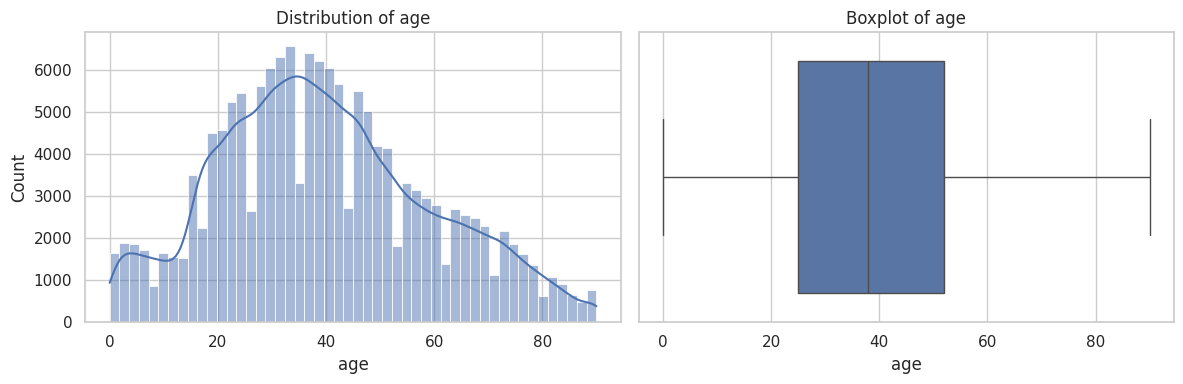

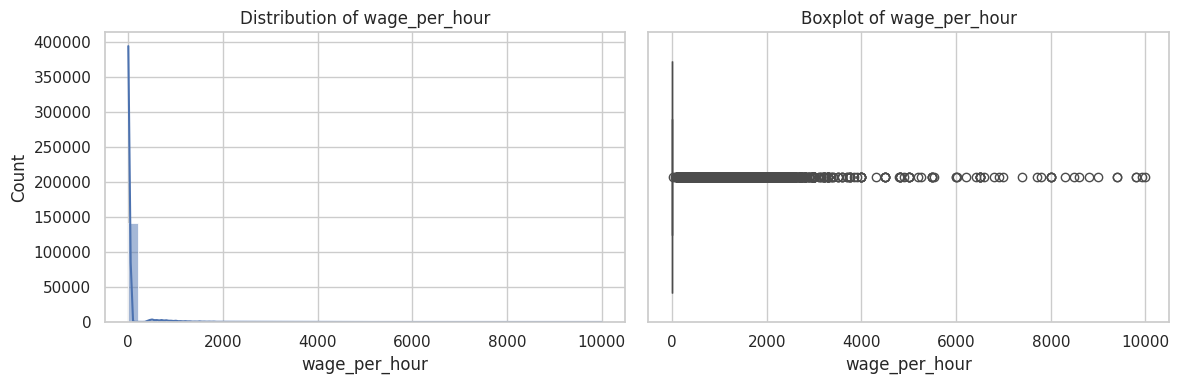

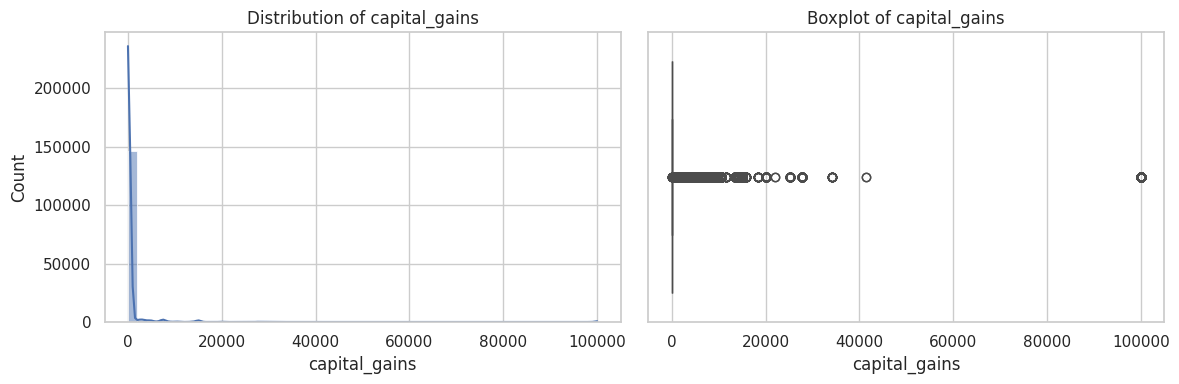

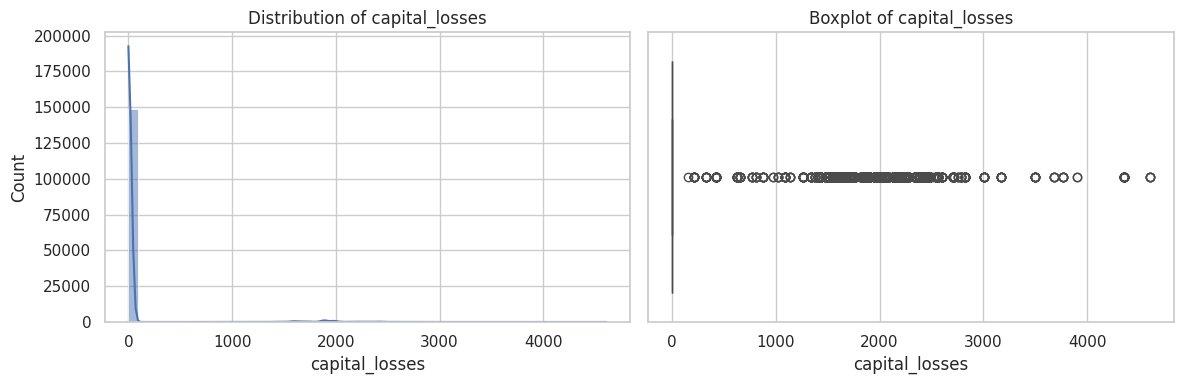

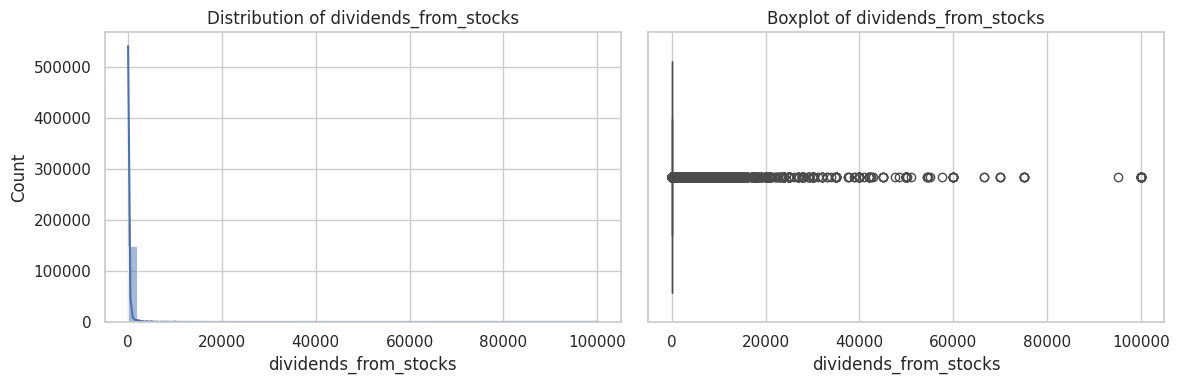

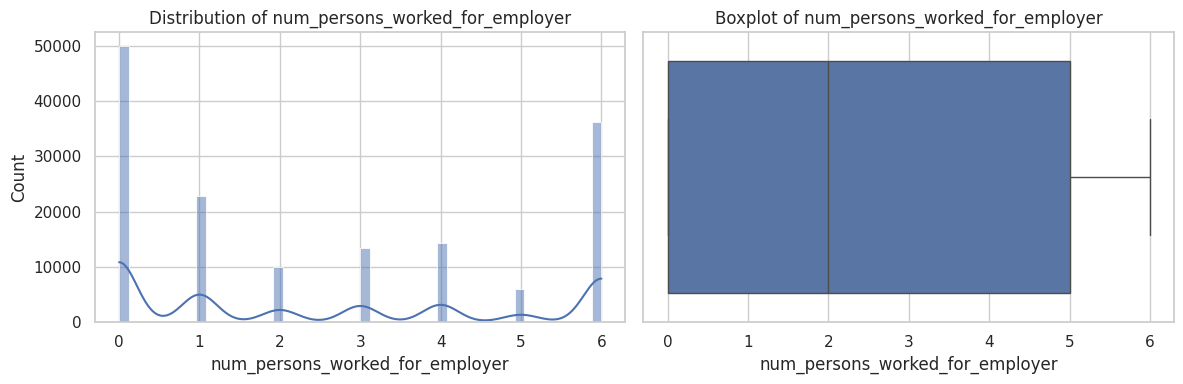

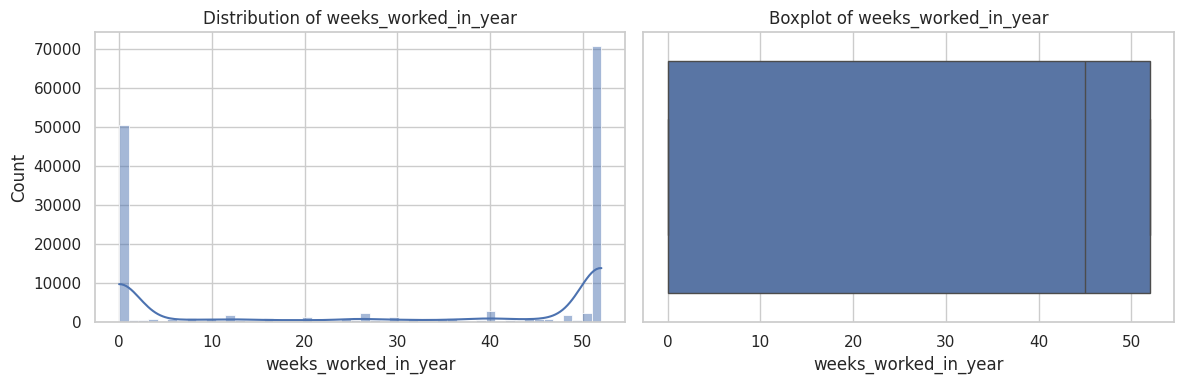

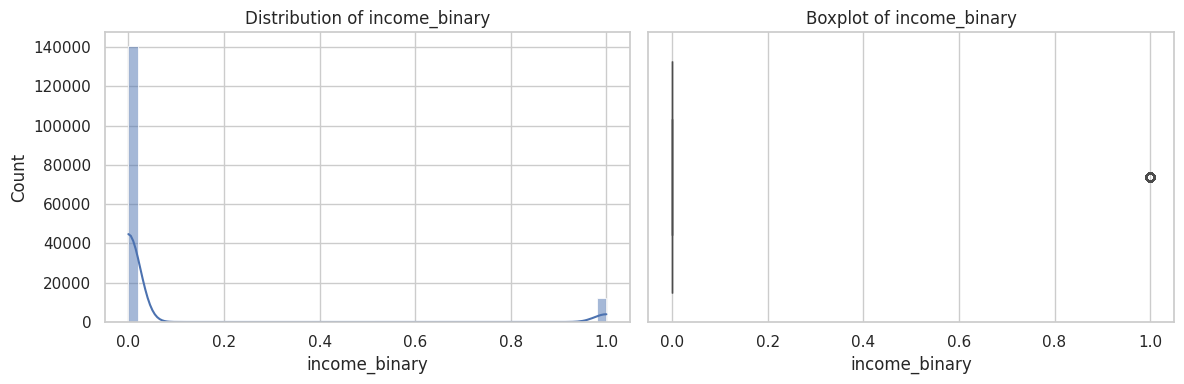

In [50]:
# Set visual style
sns.set(style="whitegrid")

# Select numeric columns
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Plot distributions and boxplots
for col in numeric_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(train_df[col].dropna(), bins=50, kde=True, ax=axs[0])
    axs[0].set_title(f"Distribution of {col}")

    sns.boxplot(x=train_df[col], ax=axs[1])
    axs[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()



🔹 class_of_worker — Unique values: 8
Top values:
class_of_worker
Private                           71738
NaN                               54151
Self-employed-not incorporated     8321
Local government                   7726
State government                   4221


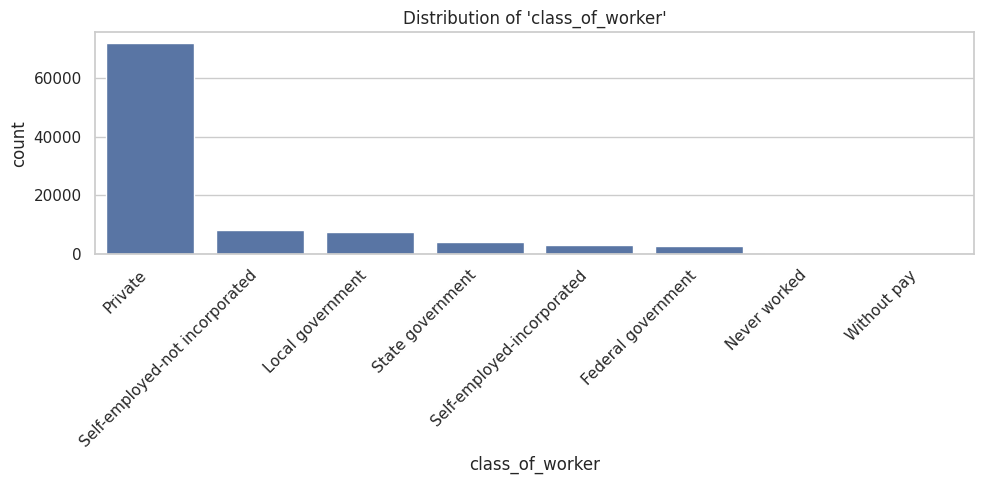


🔹 education — Unique values: 17
Top values:
education
High school graduate          43642
Some college but no degree    26329
Bachelors degree(BA AB BS)    19391
Children                      12696
10th grade                     6487


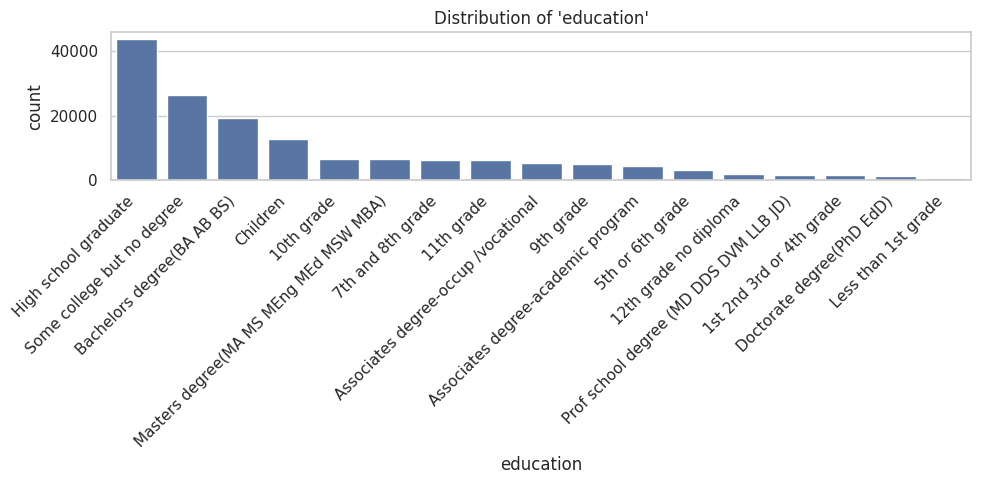


🔹 enroll_in_edu_last_wk — Unique values: 2
Top values:
enroll_in_edu_last_wk
NaN                      142229
High school                5331
College or university      5322


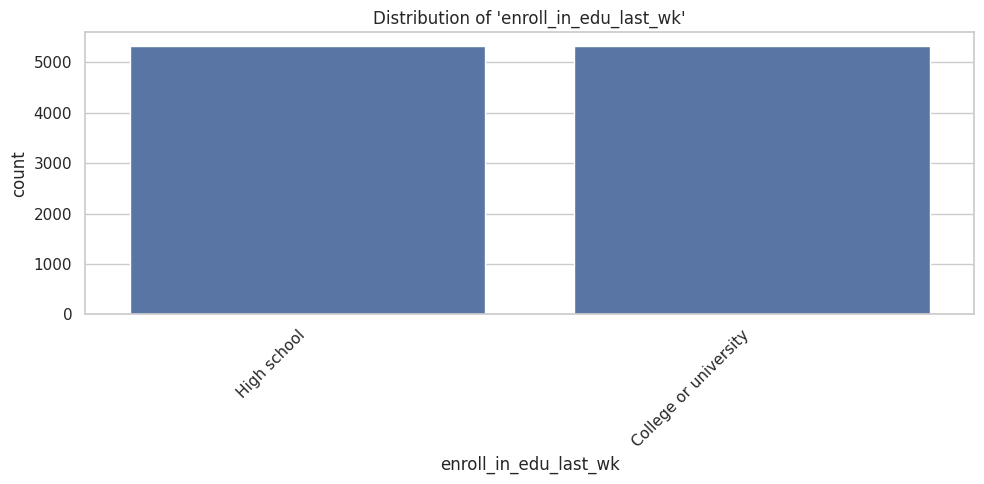


🔹 marital_stat — Unique values: 7
Top values:
marital_stat
Married-civilian spouse present    77842
Never married                      48059
Divorced                           12504
Widowed                             8873
Separated                           3430


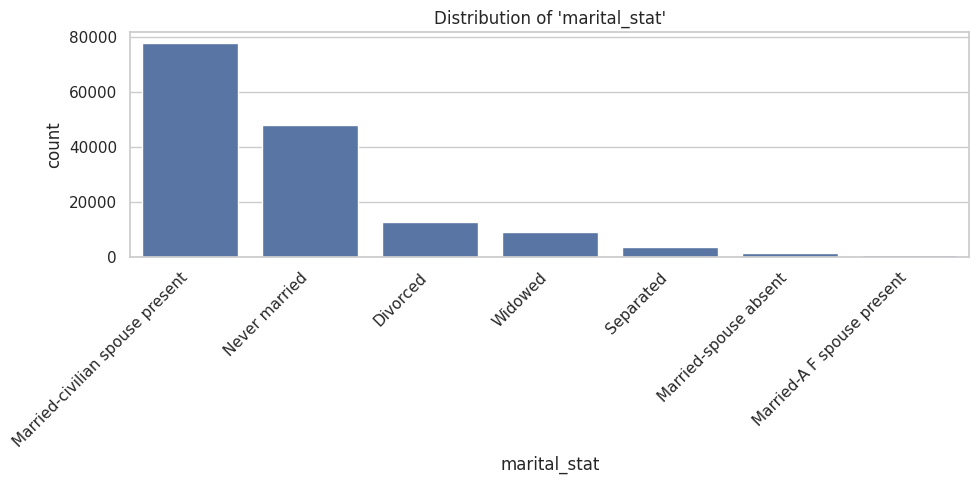


🔹 major_industry_code — Unique values: 24
Top values:
major_industry_code
Not in universe or children       54534
Retail trade                      16892
Manufacturing-durable goods        9007
Education                          8223
Manufacturing-nondurable goods     6892


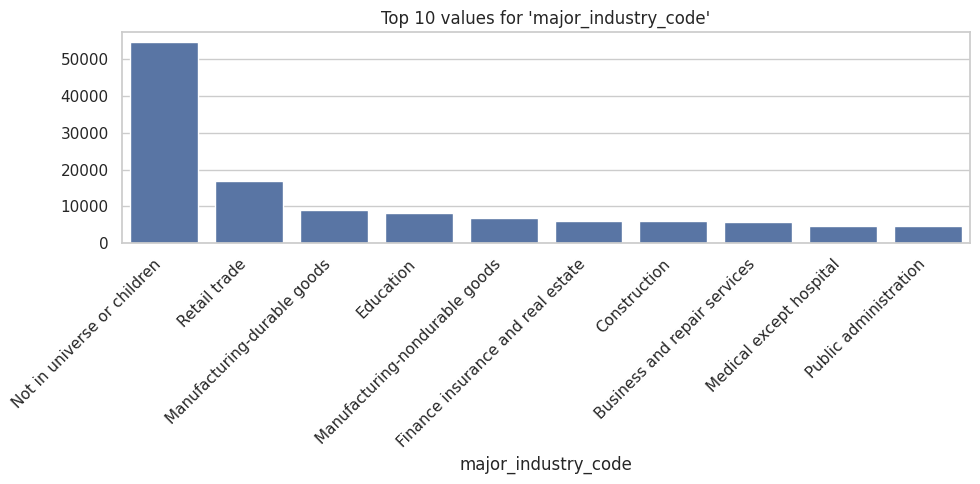


🔹 major_occupation_code — Unique values: 14
Top values:
major_occupation_code
NaN                               54534
Adm support including clerical    14797
Professional specialty            13866
Executive admin and managerial    12483
Other service                     12034


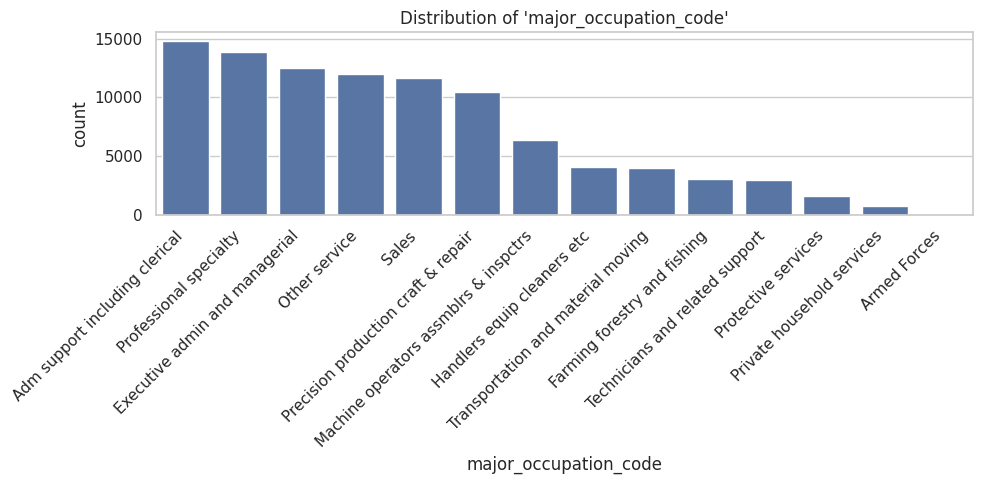


🔹 race — Unique values: 5
Top values:
race
White                          126994
Black                           15074
Asian or Pacific Islander        5502
Other                            3439
Amer Indian Aleut or Eskimo      1873


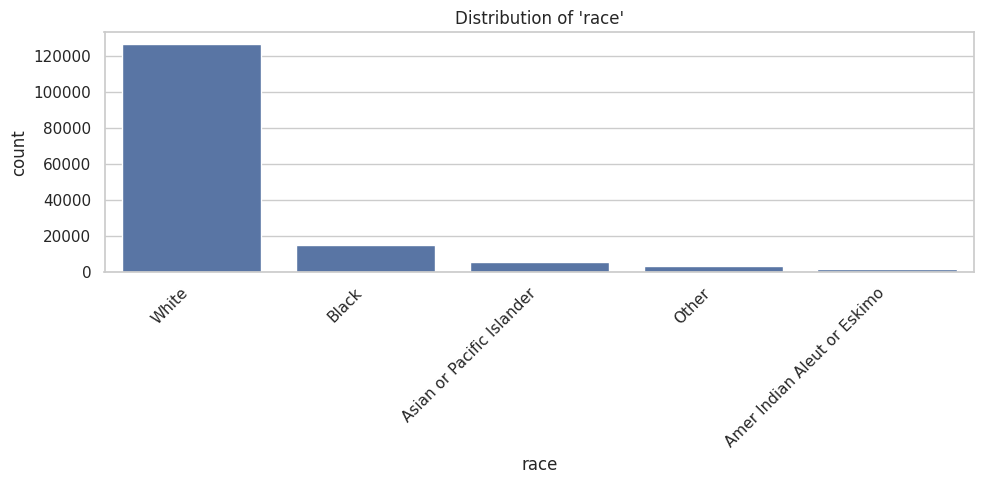


🔹 hispanic_origin — Unique values: 8
Top values:
hispanic_origin
All other                    128819
Mexican (Mexicano)             6310
Mexican-American               6026
Central or South American      3804
Puerto Rican                   3064


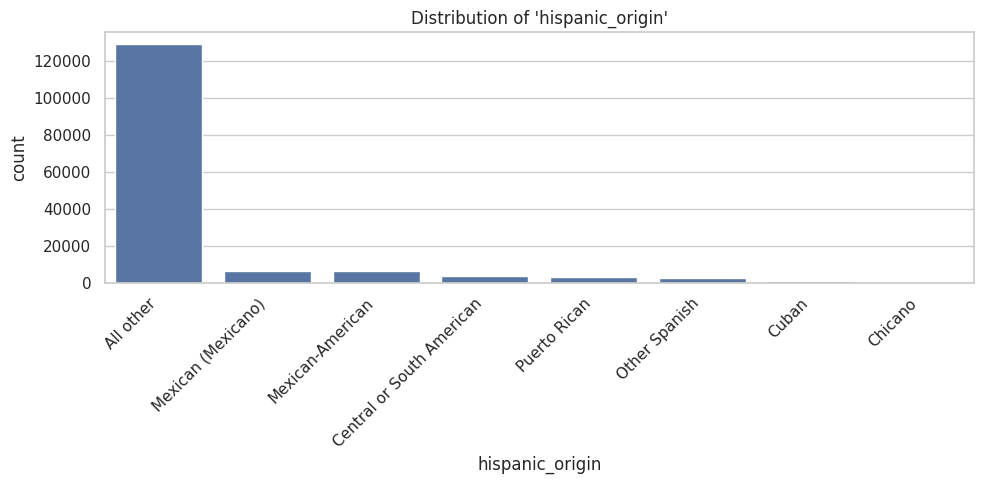


🔹 sex — Unique values: 2
Top values:
sex
Female    78702
Male      74180


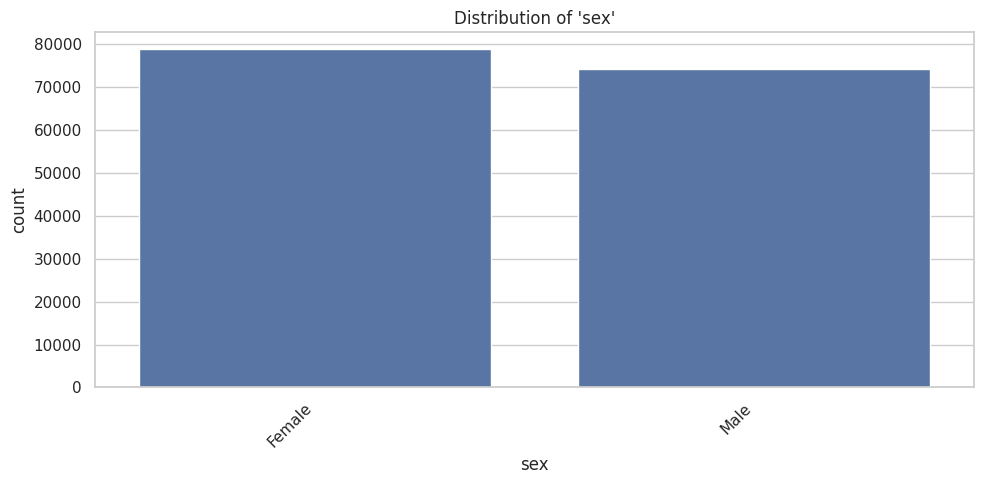


🔹 member_of_labor_union — Unique values: 2
Top values:
member_of_labor_union
NaN    133826
No      16028
Yes      3028


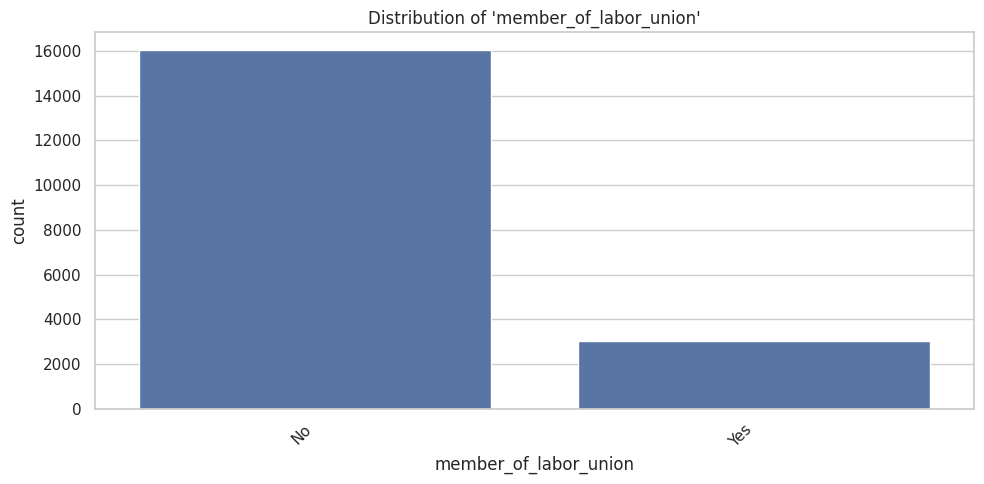


🔹 reason_for_unemployment — Unique values: 5
Top values:
reason_for_unemployment
NaN                      146870
Other job loser            2038
Re-entrant                 2017
Job loser - on layoff       976
Job leaver                  598


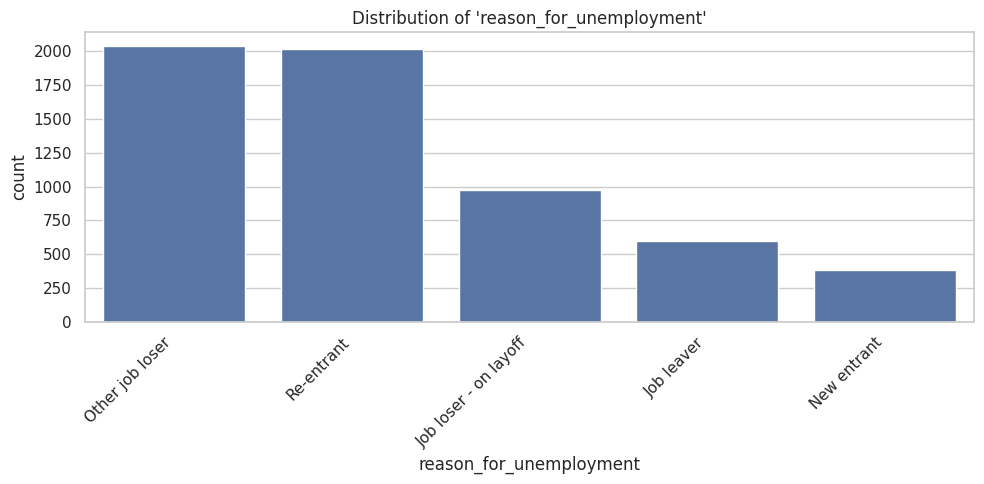


🔹 full_or_part_time_stat — Unique values: 8
Top values:
full_or_part_time_stat
Children or Armed Forces              83327
Full-time schedules                   40477
Not in labor force                    20900
PT for non-econ reasons usually FT     3322
Unemployed full-time                   2308


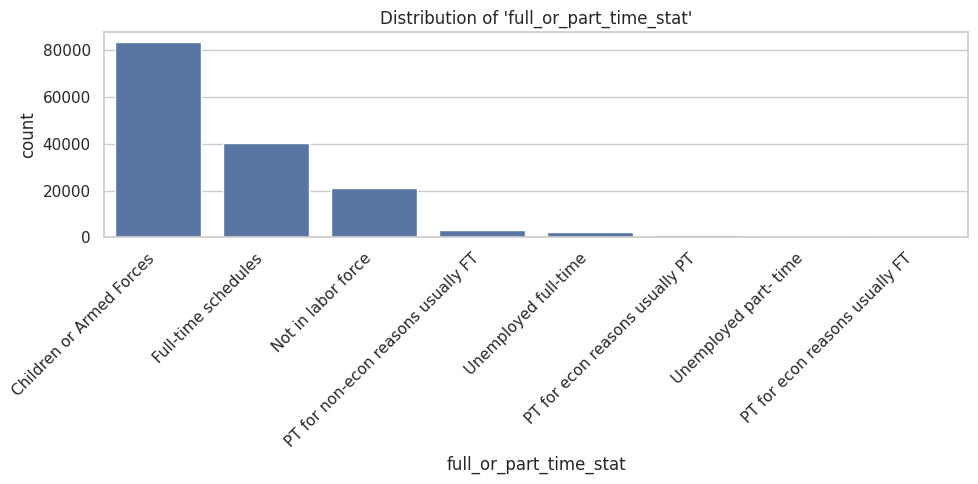


🔹 tax_filer_stat — Unique values: 6
Top values:
tax_filer_stat
Joint both under 65    64159
Single                 36576
Nonfiler               34718
Head of household       7417
Joint both 65+          6556


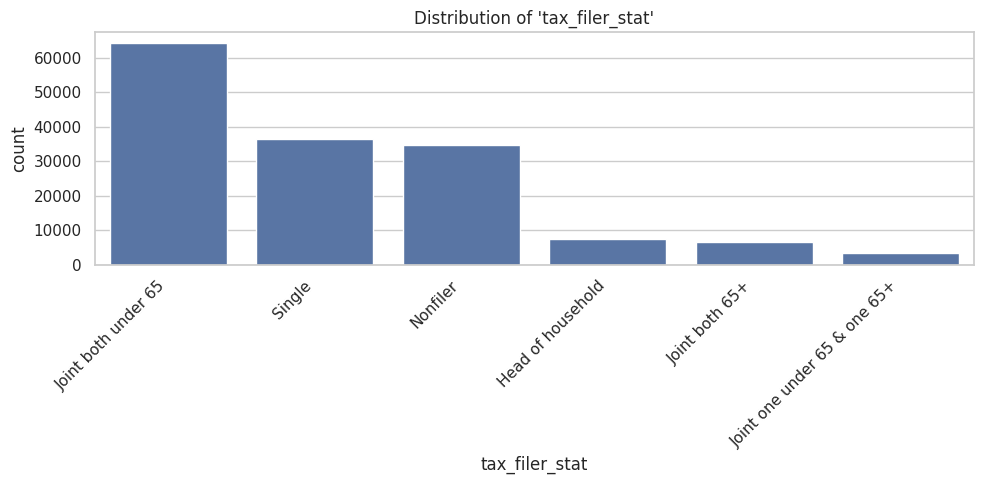


🔹 region_prev_residence — Unique values: 5
Top values:
region_prev_residence
NaN          137478
South          4768
West           3997
Midwest        3451
Northeast      2661


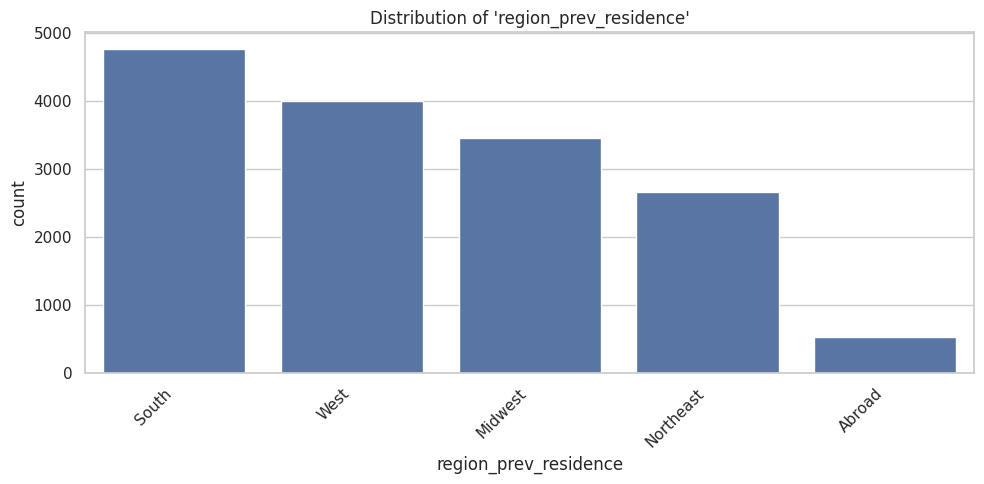


🔹 state_prev_residence — Unique values: 49
Top values:
state_prev_residence
NaN               138176
California          1669
Utah                1026
Florida              814
North Carolina       792


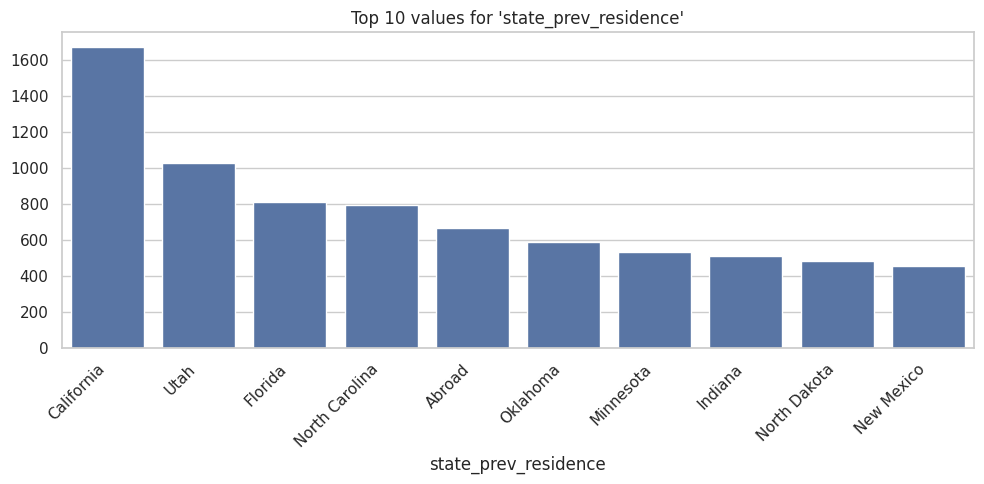


🔹 household_family_stat — Unique values: 38
Top values:
household_family_stat
Householder                                51118
Spouse of householder                      37151
Nonfamily householder                      20629
Child <18 never marr not in subfamily      15171
Child 18+ never marr Not in a subfamily    11344


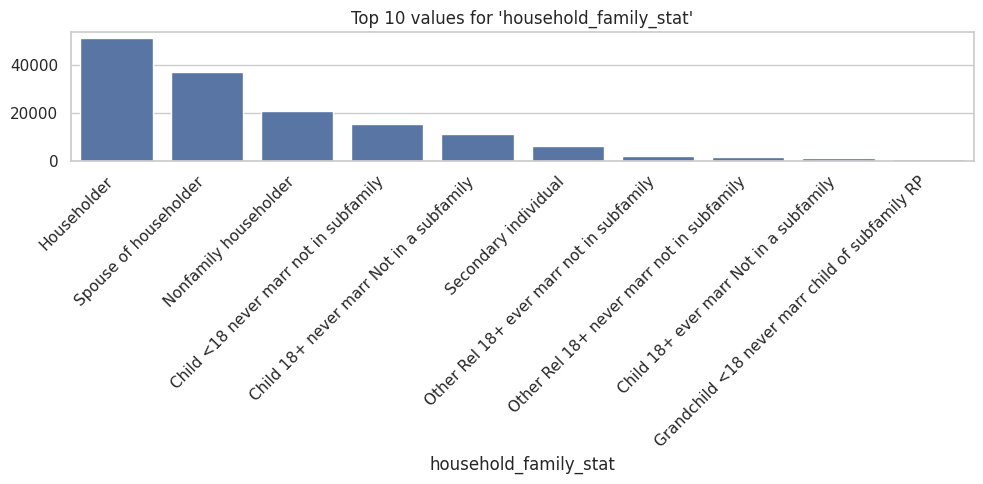


🔹 household_summary — Unique values: 8
Top values:
household_summary
Householder                      71761
Spouse of householder            37165
Child under 18 never married     15267
Child 18 or older                13719
Other relative of householder     7690


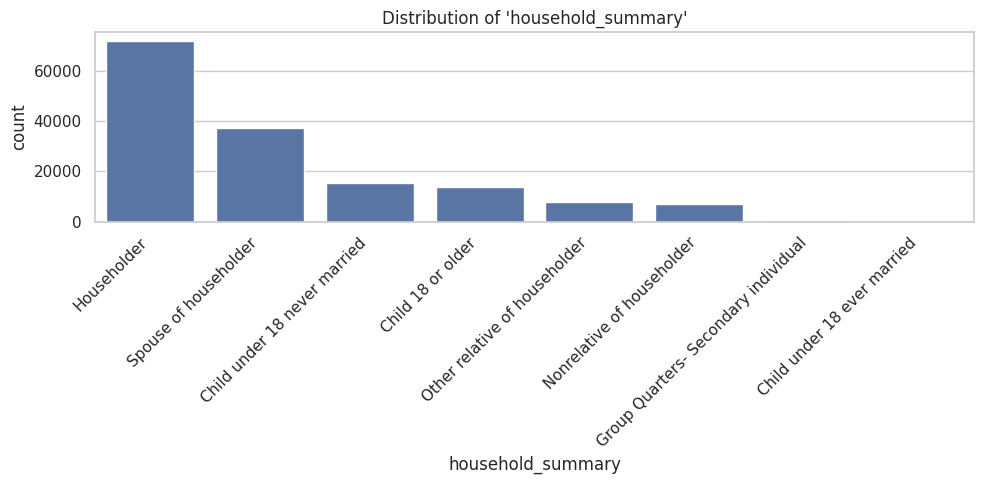


🔹 msa_change_code — Unique values: 7
Top values:
msa_change_code
NaN                 75711
Nonmover            62191
MSA to MSA          10299
NonMSA to nonMSA     2759
MSA to nonMSA         784


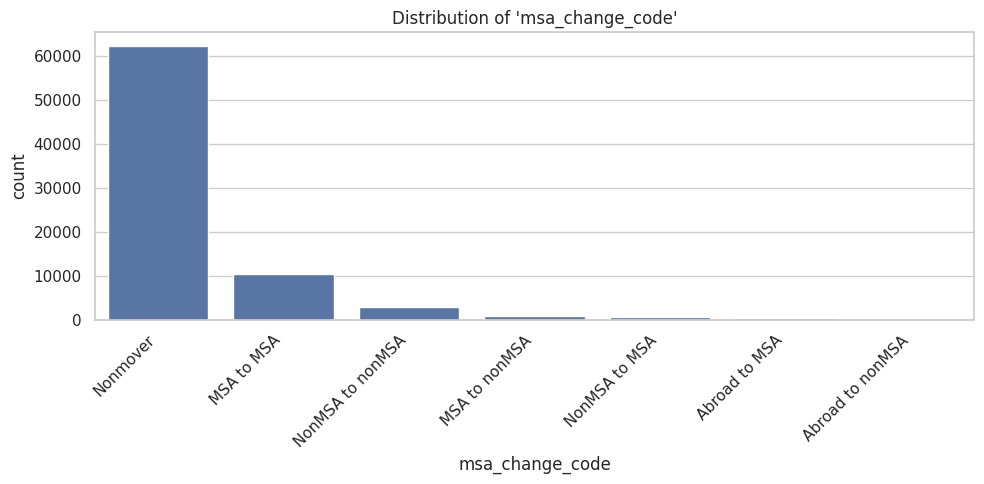


🔹 reg_change_code — Unique values: 7
Top values:
reg_change_code
NaN                            75287
Nonmover                       62191
Same county                     9479
Different county same state     2773
Different region                1173


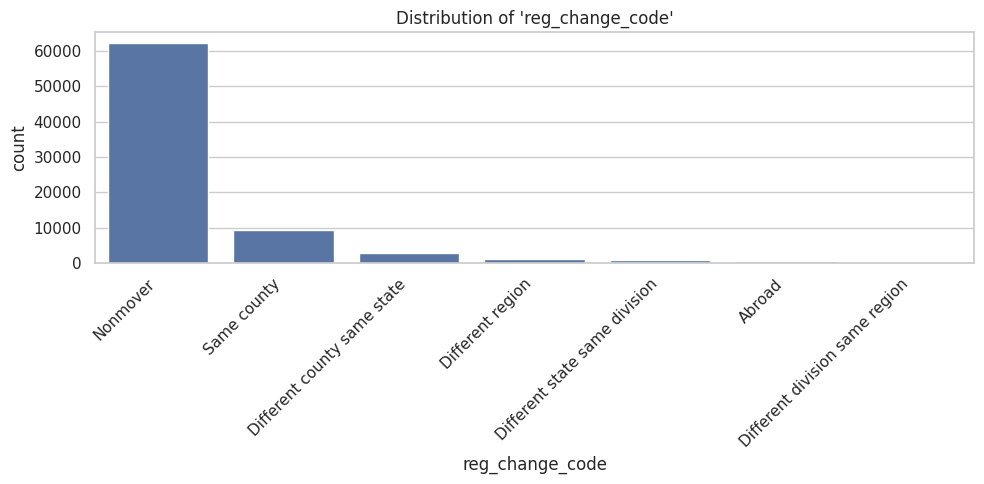


🔹 move_within_reg — Unique values: 8
Top values:
move_within_reg
NaN                            75287
Nonmover                       62191
Same county                     9479
Different county same state     2773
Different state in South         971


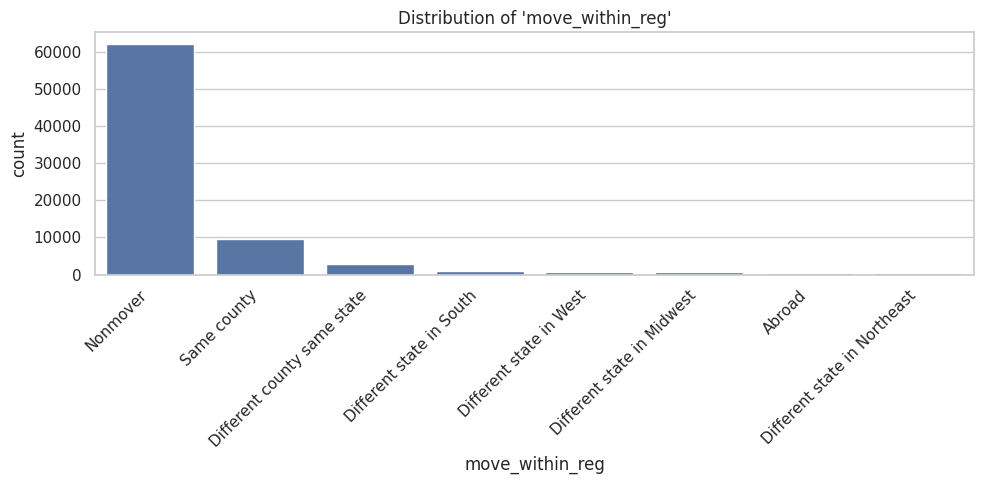


🔹 live_in_this_house_1_year_ago — Unique values: 3
Top values:
live_in_this_house_1_year_ago
Not in universe under 1 year old    75287
Yes                                 62191
No                                  15404


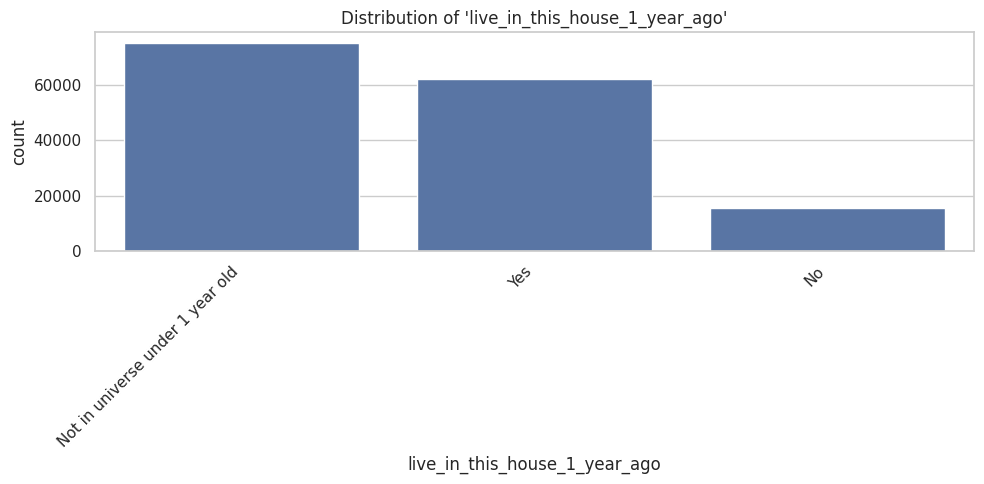


🔹 prev_residence_sunbelt — Unique values: 2
Top values:
prev_residence_sunbelt
NaN    137478
No       9767
Yes      5637


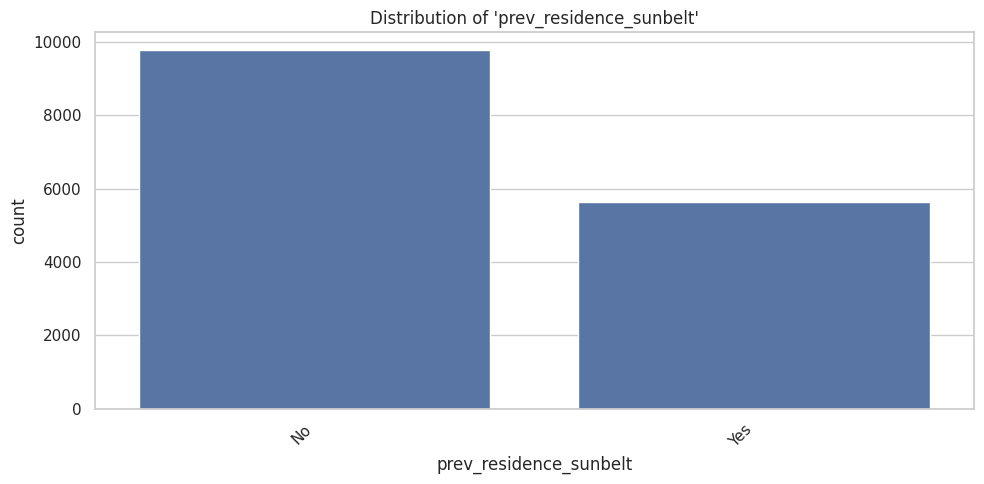


🔹 family_members_under_18 — Unique values: 4
Top values:
family_members_under_18
NaN                       134959
Both parents present       10849
Mother only present         5137
Father only present         1028
Neither parent present       909


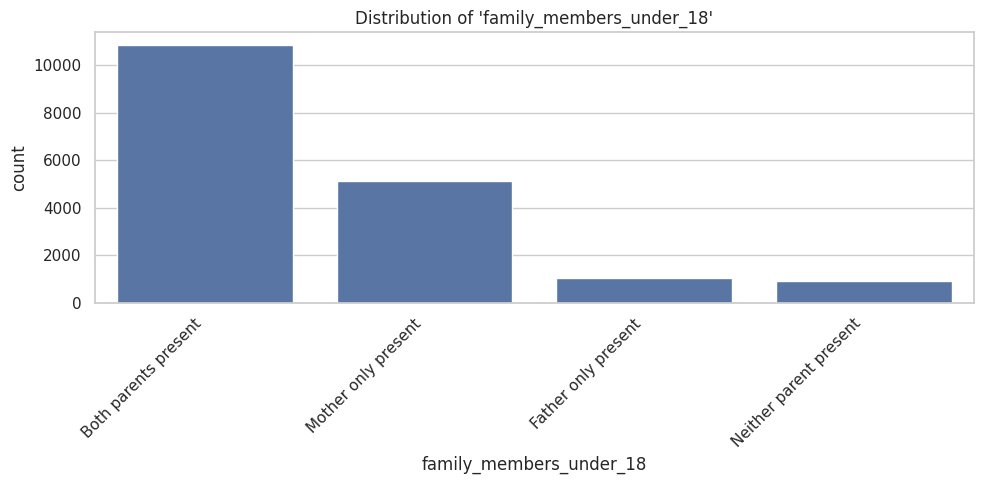


🔹 country_birth_father — Unique values: 42
Top values:
country_birth_father
United-States    115457
Mexico             8120
NaN                6383
Puerto-Rico        2560
Italy              2150


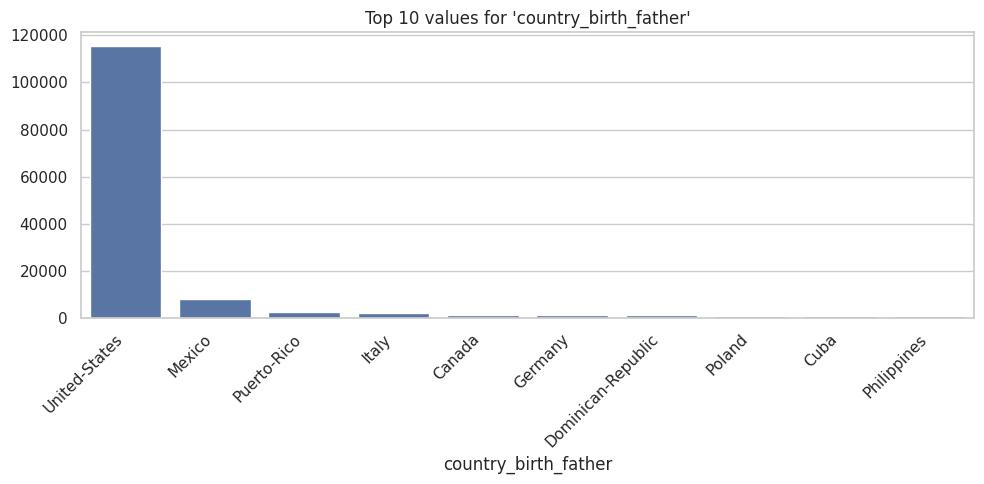


🔹 country_birth_mother — Unique values: 42
Top values:
country_birth_mother
United-States    116603
Mexico             7993
NaN                5810
Puerto-Rico        2378
Italy              1786


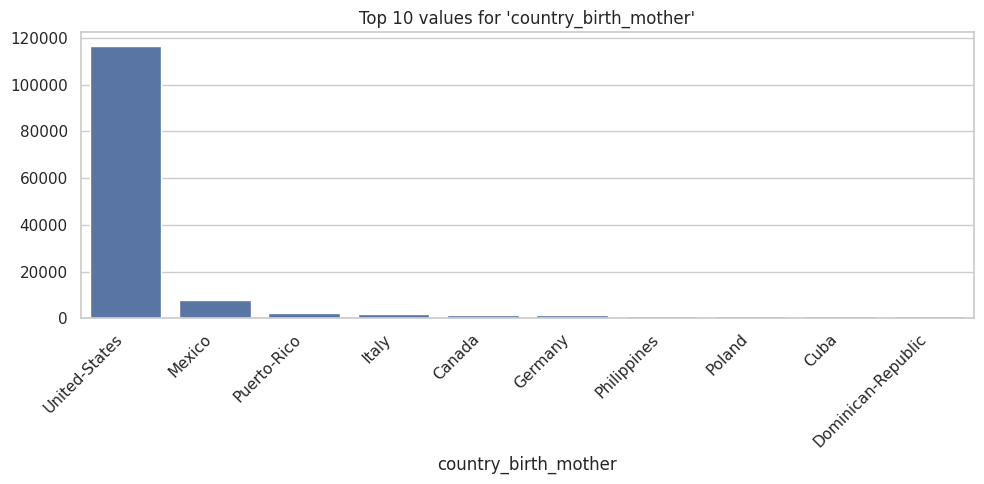


🔹 country_birth_self — Unique values: 42
Top values:
country_birth_self
United-States    130929
Mexico             5379
NaN                3322
Puerto-Rico        1388
Philippines         837


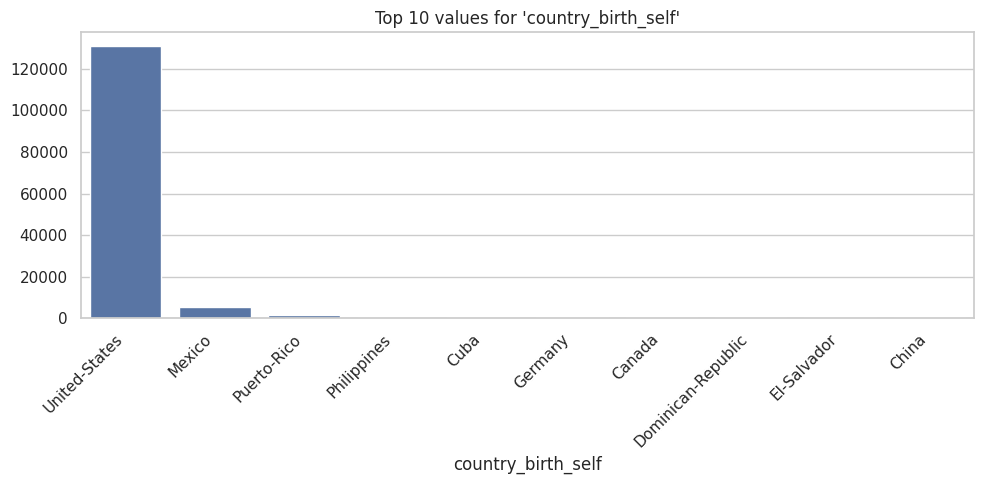


🔹 citizenship — Unique values: 5
Top values:
citizenship
Native- Born in the United States              130932
Foreign born- Not a citizen of U S              12887
Foreign born- U S citizen by naturalization      5829
Native- Born abroad of American Parent(s)        1727
Native- Born in Puerto Rico or U S Outlying      1507


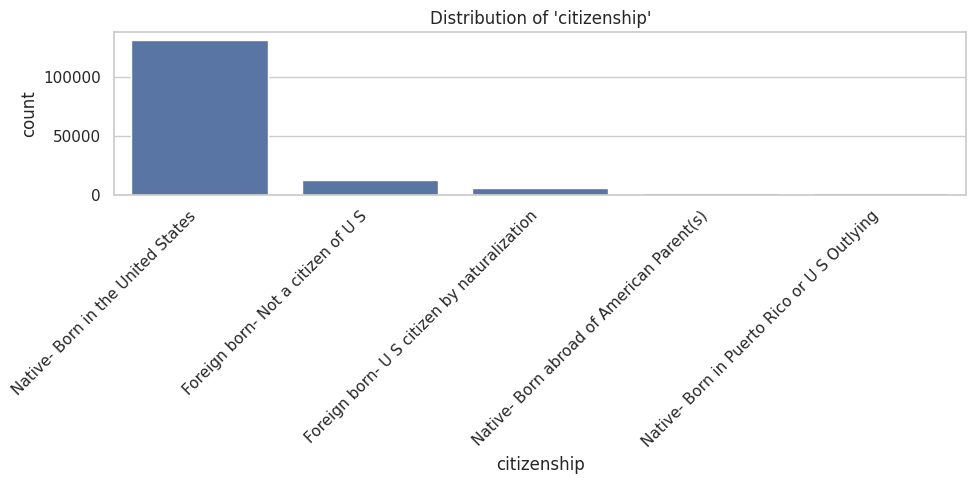


🔹 veterans_admin_questionnaire — Unique values: 2
Top values:
veterans_admin_questionnaire
NaN    150917
No       1575
Yes       390


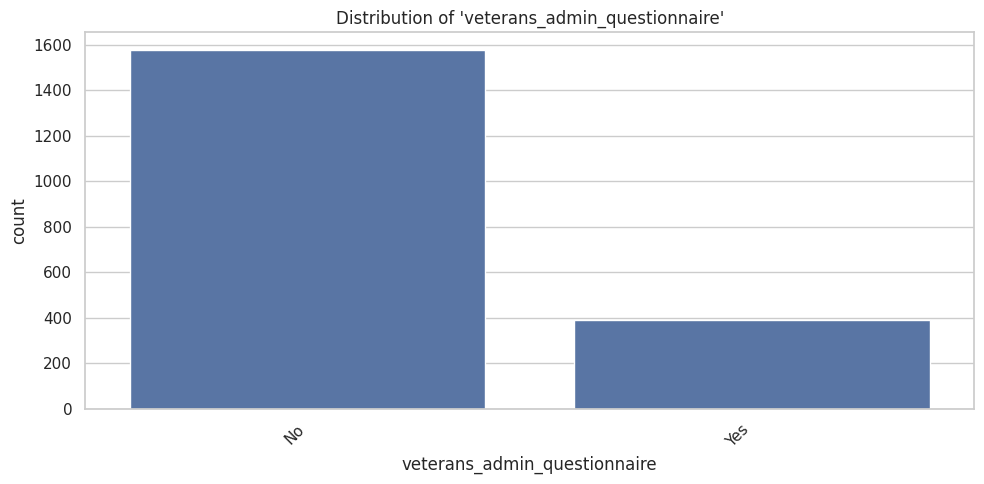


🔹 income — Unique values: 2
Top values:
income
- 50000.    140515
50000+.      12367


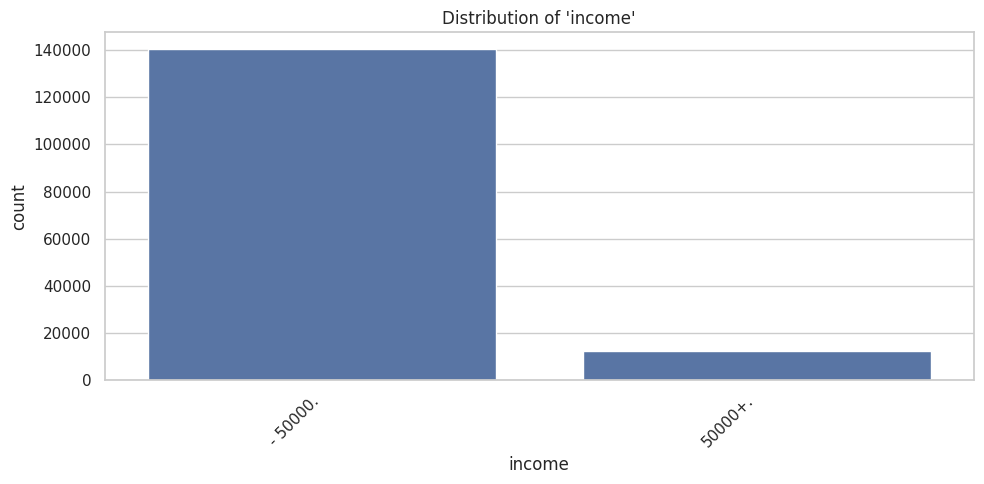

In [27]:
# Sélection des colonnes catégorielles
cat_cols = train_df.select_dtypes(include='object').columns

# Pour chaque colonne catégorielle
for col in cat_cols:
    n_unique = train_df[col].nunique()
    top_values = train_df[col].value_counts(dropna=False).head(5)

    print(f"\n🔹 {col} — Unique values: {n_unique}")
    print(f"Top values:\n{top_values.to_string()}")

    # Si peu de modalités, on affiche un barplot complet
    if n_unique <= 20:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=train_df, x=col, order=train_df[col].value_counts().index)
        plt.title(f"Distribution of '{col}'")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        # Si beaucoup de modalités, on affiche uniquement les 10 principales
        plt.figure(figsize=(10, 5))
        top10 = train_df[col].value_counts().head(10)
        sns.barplot(x=top10.index, y=top10.values)
        plt.title(f"Top 10 values for '{col}'")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


#### Viz NA + suppression

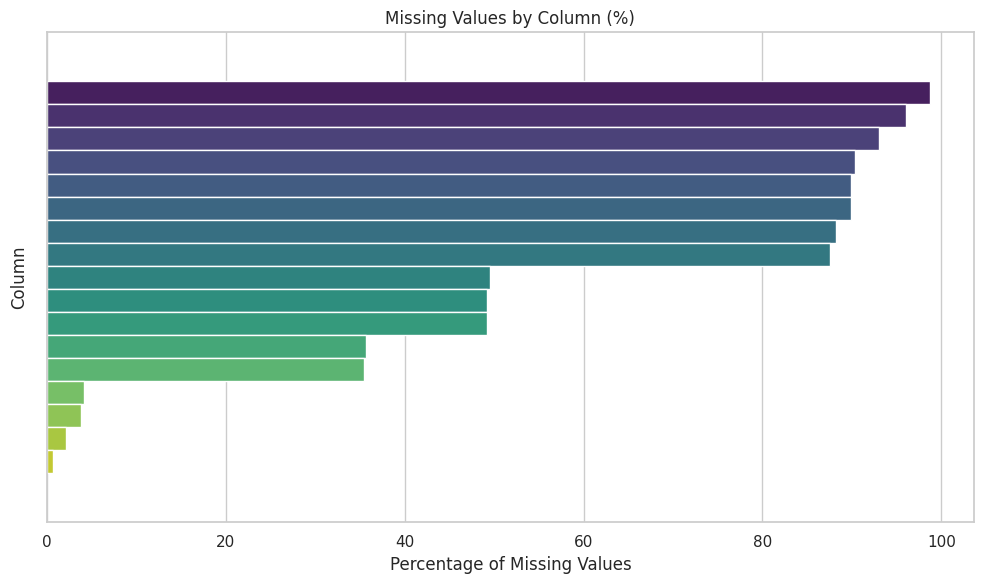

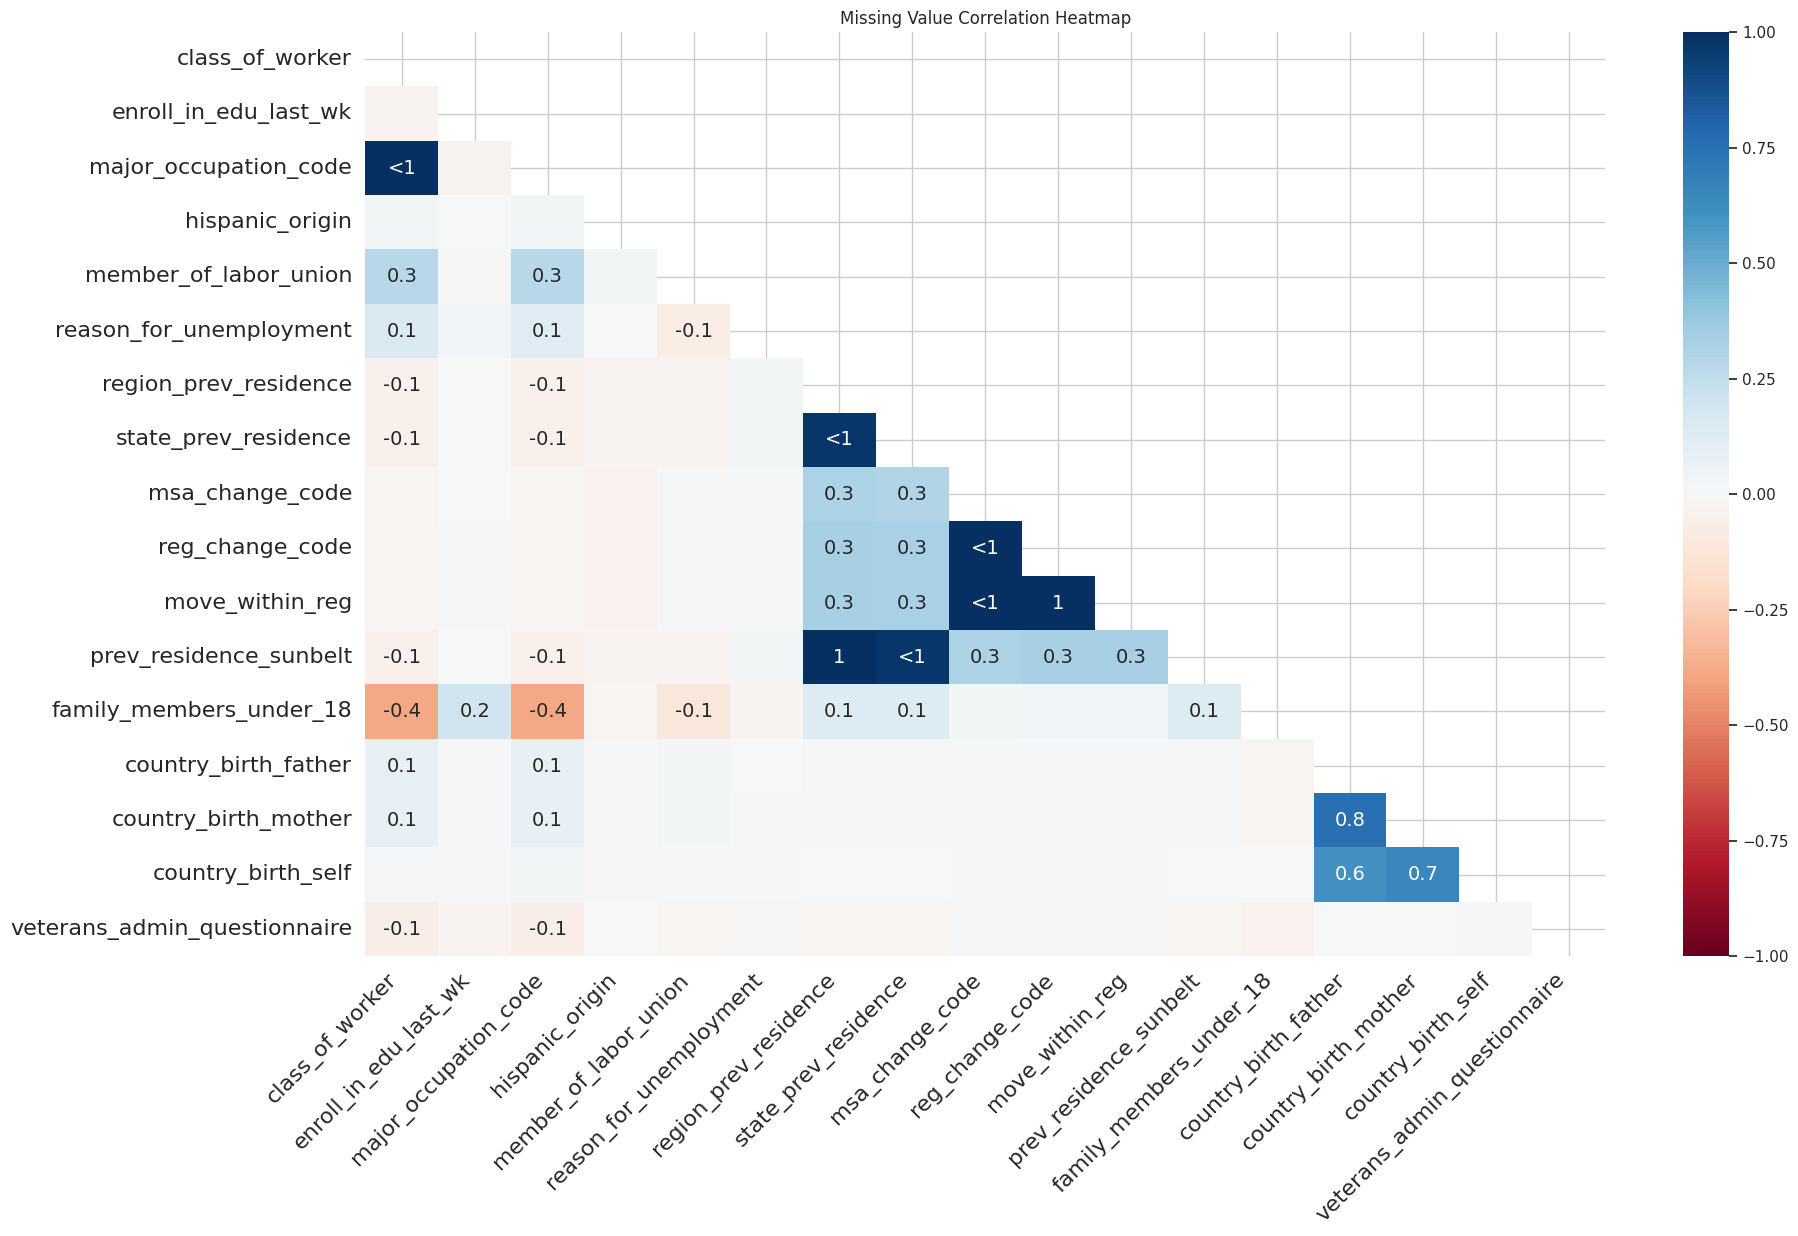

In [33]:
# Calculate missing percentage
missing_pct = (train_df.isna().mean() * 100).sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_pct.values, hue=missing_pct.index, palette="viridis",legend=False)
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Column")
plt.title("Missing Values by Column (%)")
plt.tight_layout()
plt.show()

# Optional: correlation between missing values
msno.heatmap(train_df)
plt.title("Missing Value Correlation Heatmap")
plt.show()

In [6]:
# Summarize missing values per column
missing_counts = train_df.isna().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

missing_percentages = (train_df.isna().mean() * 100).round(2)
missing_percentages = missing_percentages[missing_percentages > 0].sort_values(ascending=False)
# Display summary
print("\n🧾 Missing values summary (percentage):\n")
print(missing_percentages)


🧾 Missing values summary (percentage):

Series([], dtype: float64)


In [9]:
# Define threshold (90%)
threshold = 0.85

# Calculate missing ratio
missing_ratio = train_df.isna().mean()

# Identify columns to drop
cols_to_drop = missing_ratio[missing_ratio > threshold].index.tolist()
print(f"📉 Columns with >90% missing values:\n{cols_to_drop}")

# Drop from both train and test sets
train_df.drop(columns=cols_to_drop, inplace=True)
test_df.drop(columns=cols_to_drop, inplace=True)

print(f"✅ Remaining columns: {train_df.shape[1]}")

📉 Columns with >90% missing values:
['enroll_in_edu_last_wk', 'member_of_labor_union', 'reason_for_unemployment', 'region_prev_residence', 'state_prev_residence', 'prev_residence_sunbelt', 'family_members_under_18', 'veterans_admin_questionnaire']
✅ Remaining columns: 33


#### Outliers 

In [8]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    print(f"{col}: min={train_df[col].min()}, max={train_df[col].max()}, unique={train_df[col].nunique()}")

age: min=0, max=90, unique=91
detailed_industry_recode: min=0, max=51, unique=52
detailed_occupation_recode: min=0, max=46, unique=47
wage_per_hour: min=0, max=9999, unique=1240
capital_gains: min=0, max=99999, unique=132
capital_losses: min=0, max=4608, unique=113
dividends_from_stocks: min=0, max=99999, unique=1478
num_persons_worked_for_employer: min=0, max=6, unique=7
own_business_or_self_employed: min=0, max=2, unique=3
veterans_benefits: min=0, max=2, unique=3
weeks_worked_in_year: min=0, max=52, unique=53
year: min=94, max=95, unique=2


#### Imputations 

In [14]:
def create_missing_flags(df):
    missing_cols = df.columns[df.isna().any()]
    for col in missing_cols:
        flag_name = f"{col}_is_missing"
        df[flag_name] = df[col].isna().astype(int)
    print(f"✅ Added {len(missing_cols)} missing flags.")
    return df

# Apply to both datasets
train_df = create_missing_flags(train_df)
test_df = create_missing_flags(test_df)


✅ Added 14 missing flags.
✅ Added 14 missing flags.


In [15]:
from sklearn.impute import SimpleImputer

# Séparer les colonnes numériques et catégorielles
num_cols = train_df.select_dtypes(include=['number']).columns
cat_cols = train_df.select_dtypes(include='object').columns

# Imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')  # ou strategy='constant', fill_value='Missing'

# Imputation
train_df[num_cols] = num_imputer.fit_transform(train_df[num_cols])
train_df[cat_cols] = cat_imputer.fit_transform(train_df[cat_cols])

#### Correlation analysis

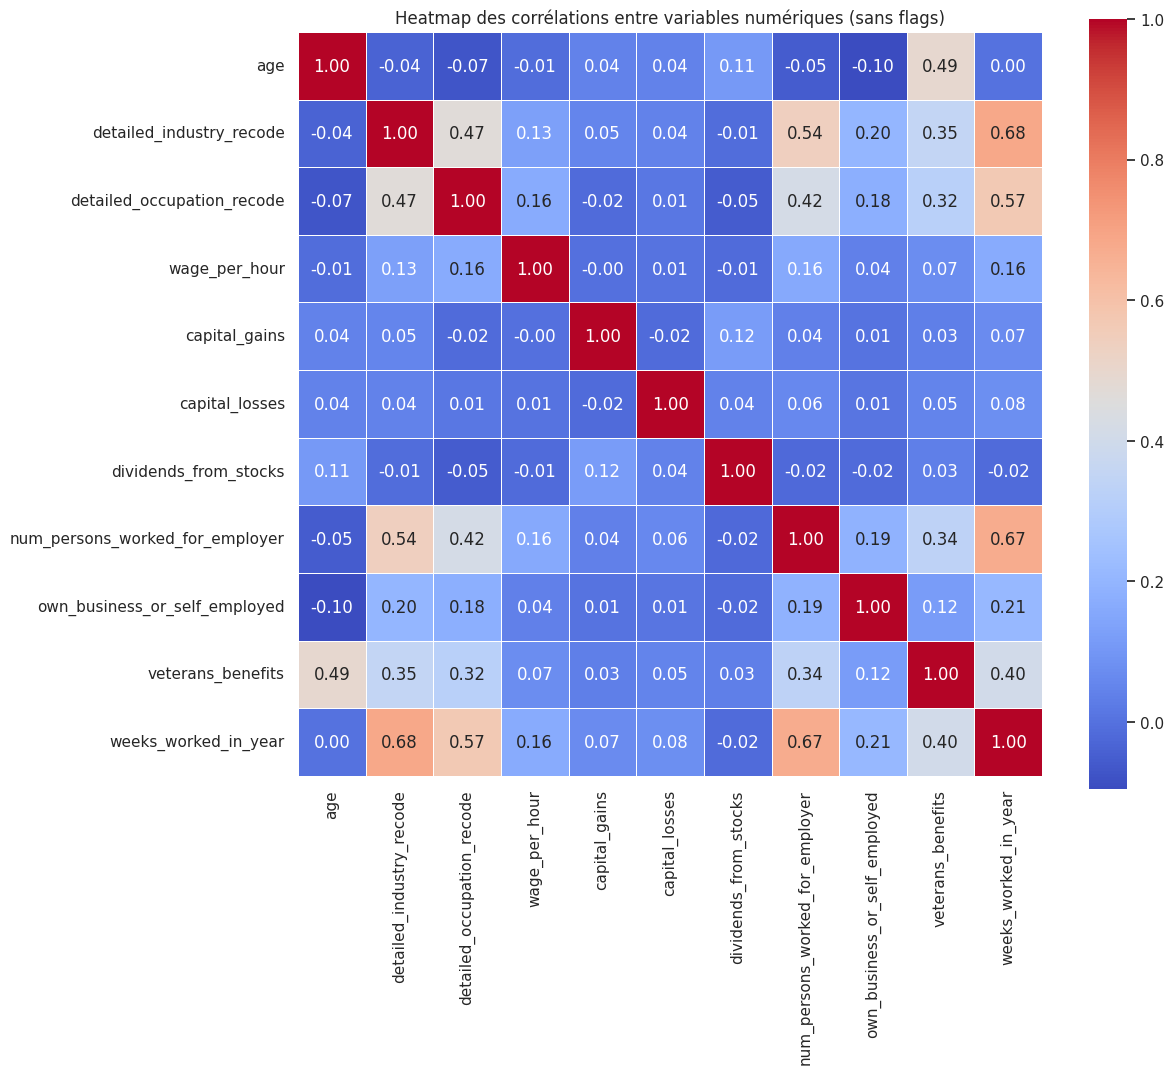

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sélection des colonnes numériques sans les flags "is_missing"
num_cols = train_df.select_dtypes(include=['number']).columns
num_cols = [col for col in num_cols if not col.endswith('_is_missing')]

# Calcul de la matrice de corrélation
corr_matrix = train_df[num_cols].corr(method='pearson')

# Affichage de la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title("Heatmap des corrélations entre variables numériques (sans flags)")
plt.show()


In [22]:
from scipy.stats import pointbiserialr

# Créer income binaire si pas encore fait
if 'income_binary' not in train_df:
    train_df['income_binary'] = train_df['income'].apply(lambda x: 1 if '50000+' in x else 0)

# Corrélation avec la cible
for col in num_cols:
    if col in train_df.columns:
        corr, _ = pointbiserialr(train_df[col], train_df['income_binary'])
        print(f"{col}: correlation with income = {corr:.3f}")


age: correlation with income = 0.101
detailed_industry_recode: correlation with income = 0.146
detailed_occupation_recode: correlation with income = -0.044
wage_per_hour: correlation with income = 0.005
capital_gains: correlation with income = 0.239
capital_losses: correlation with income = 0.147
dividends_from_stocks: correlation with income = 0.176
num_persons_worked_for_employer: correlation with income = 0.171
own_business_or_self_employed: correlation with income = 0.015
veterans_benefits: correlation with income = 0.088
weeks_worked_in_year: correlation with income = 0.220


                          feature  mutual_info
24                         income     0.266785
1                       education     0.052879
4           major_occupation_code     0.047499
3             major_industry_code     0.028647
12          household_family_stat     0.028377
9                  tax_filer_stat     0.025912
13              household_summary     0.025835
2                    marital_stat     0.016745
7                             sex     0.015942
0                 class_of_worker     0.010598
20           country_birth_father     0.004588
6                 hispanic_origin     0.004524
21           country_birth_mother     0.004327
19        family_members_under_18     0.004024
5                            race     0.003042
22             country_birth_self     0.003026
14                msa_change_code     0.002829
11           state_prev_residence     0.002592
15                reg_change_code     0.002550
16                move_within_reg     0.002549
17  live_in_t

/tmp/ipykernel_1899/1182021256.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mi_df, x='mutual_info', y='feature', palette='viridis')


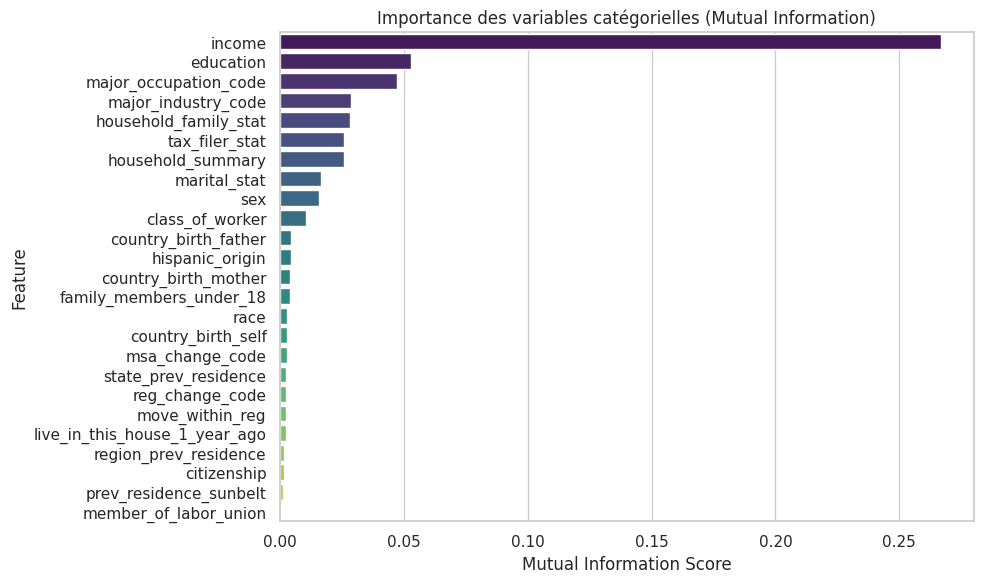

In [24]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Encode target
y = train_df['income_binary']

# Sélection des colonnes catégorielles
cat_cols = train_df.select_dtypes(include='object').columns

# Encoder les catégorielles (LabelEncoder par colonne)
X_cat = train_df[cat_cols].copy()
for col in X_cat.columns:
    X_cat[col] = LabelEncoder().fit_transform(X_cat[col].astype(str))

# Calcul de la mutual information
mi_scores = mutual_info_classif(X_cat, y, discrete_features=True)

# Résultats dans un DataFrame
mi_df = pd.DataFrame({'feature': cat_cols, 'mutual_info': mi_scores})
mi_df.sort_values(by='mutual_info', ascending=False, inplace=True)

# Affichage
print(mi_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=mi_df, x='mutual_info', y='feature', palette='viridis')
plt.title("Importance des variables catégorielles (Mutual Information)")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


#### Train

In [17]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# --- Target: binarize income ---
train_df['income_binary'] = train_df['income'].apply(lambda x: 1 if '50000+' in x else 0)
test_df['income_binary'] = test_df['income'].apply(lambda x: 1 if '50000+' in x else 0)

# --- Features and target split ---
X_train = train_df.drop(columns=['income', 'income_binary'])
y_train = train_df['income_binary']
X_test = test_df.drop(columns=['income', 'income_binary'])
y_test = test_df['income_binary']

# --- Detect categorical features ---
cat_cols_to_convert = [
    'detailed_industry_recode',
    'detailed_occupation_recode',
    'own_business_or_self_employed',
    'veterans_benefits',
    'year' 
]
for col in cat_cols_to_convert:
    train_df[col] = train_df[col].astype(str)
    test_df[col] = test_df[col].astype(str)

cat_features = X_train.select_dtypes(include='object').columns.tolist()
X_train[cat_features] = X_train[cat_features].fillna('missing')
X_test[cat_features] = X_test[cat_features].fillna('missing')

# --- CatBoost model with class weights ---
model = CatBoostClassifier(
    iterations=800,
    learning_rate=0.01,
    depth=8,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=100,
    random_seed=42,
    auto_class_weights='Balanced'  # for class imbalance
)

# --- Train ---
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    use_best_model=True
)

# --- Predict ---
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# --- Evaluate ---
print(classification_report(y_test, y_pred, digits=3))
print('Test ROC AUC:', roc_auc_score(y_test, y_proba))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))


0:	test: 0.9223152	best: 0.9223152 (0)	total: 134ms	remaining: 1m 47s
100:	test: 0.9435943	best: 0.9435943 (100)	total: 11.6s	remaining: 1m 20s
200:	test: 0.9466704	best: 0.9466704 (200)	total: 23s	remaining: 1m 8s
300:	test: 0.9486566	best: 0.9486566 (300)	total: 35.9s	remaining: 59.6s
400:	test: 0.9498945	best: 0.9498945 (400)	total: 49.4s	remaining: 49.2s
500:	test: 0.9507632	best: 0.9507632 (500)	total: 1m 2s	remaining: 37.4s
600:	test: 0.9513417	best: 0.9513417 (600)	total: 1m 14s	remaining: 24.8s
700:	test: 0.9517947	best: 0.9517947 (700)	total: 1m 27s	remaining: 12.3s
799:	test: 0.9522110	best: 0.9522110 (799)	total: 1m 40s	remaining: 0us

bestTest = 0.9522109997
bestIteration = 799

              precision    recall  f1-score   support

           0      0.991     0.886     0.935     93576
           1      0.336     0.874     0.485      6186

    accuracy                          0.885     99762
   macro avg      0.663     0.880     0.710     99762
weighted avg      0.950     

In [18]:
import numpy as np
from sklearn.metrics import classification_report

y_proba = model.predict_proba(X_test)[:, 1]
for threshold in [0.3, 0.4, 0.5, 0.6, 0.7]:
    print(f"\n--- Threshold: {threshold} ---")
    y_pred_adj = (y_proba > threshold).astype(int)
    print(classification_report(y_test, y_pred_adj, digits=3))
    print(confusion_matrix(y_test, y_pred_adj))


--- Threshold: 0.3 ---
              precision    recall  f1-score   support

           0      0.996     0.801     0.888     93576
           1      0.239     0.946     0.382      6186

    accuracy                          0.810     99762
   macro avg      0.617     0.874     0.635     99762
weighted avg      0.949     0.810     0.856     99762

[[74965 18611]
 [  334  5852]]

--- Threshold: 0.4 ---
              precision    recall  f1-score   support

           0      0.993     0.848     0.915     93576
           1      0.285     0.913     0.434      6186

    accuracy                          0.852     99762
   macro avg      0.639     0.881     0.675     99762
weighted avg      0.949     0.852     0.885     99762

[[79378 14198]
 [  536  5650]]

--- Threshold: 0.5 ---
              precision    recall  f1-score   support

           0      0.991     0.886     0.935     93576
           1      0.336     0.874     0.485      6186

    accuracy                          0.885     

#### Grid search CV

In [15]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    loss_function='Logloss',
    auto_class_weights='Balanced',
    cat_features=cat_features,
    random_seed=42,
    verbose=0
)

params = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [300, 600],
}

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='f1',  # Or 'roc_auc', etc.
    cv=cv,
    n_jobs=-1,
    verbose=True
)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best F1 score:", grid.best_score_)


Fitting 2 folds for each of 18 candidates, totalling 36 fits
Best parameters: {'depth': 8, 'iterations': 600, 'learning_rate': 0.1}
Best F1 score: 0.5419981592212653


#### Baseline compare

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# --- Separate features/target ---
X_train = train_df.drop(columns=['income', 'income_binary'])
y_train = train_df['income_binary']
X_test = test_df.drop(columns=['income', 'income_binary'])
y_test = test_df['income_binary']

# --- Detect columns ---
num_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()
cat_features = X_train.select_dtypes(include='object').columns.tolist()

# --- Preprocessing for sklearn models (logreg, RF) ---
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), num_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), cat_features)
])

# --- Logistic Regression ---
logreg_pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])
logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)
y_proba_logreg = logreg_pipeline.predict_proba(X_test)[:,1]
print("\n--- Logistic Regression ---")
print(classification_report(y_test, y_pred_logreg, digits=3))
print('ROC AUC:', roc_auc_score(y_test, y_proba_logreg))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_logreg))

# --- Random Forest ---
rf_pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:,1]
print("\n--- Random Forest ---")
print(classification_report(y_test, y_pred_rf, digits=3))
print('ROC AUC:', roc_auc_score(y_test, y_proba_rf))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_rf))

# --- CatBoost ---
# Fix: cat_features must be column names
from copy import deepcopy
X_train_cb = deepcopy(X_train)
X_test_cb = deepcopy(X_test)
for col in cat_features:
    X_train_cb[col] = X_train_cb[col].fillna('missing')
    X_test_cb[col] = X_test_cb[col].fillna('missing')

model_cb = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    auto_class_weights='Balanced',
    random_seed=42,
    verbose=False
)
model_cb.fit(
    X_train_cb, y_train,
    cat_features=cat_features,
    eval_set=(X_test_cb, y_test),
    use_best_model=True
)
y_pred_cb = model_cb.predict(X_test_cb)
y_proba_cb = model_cb.predict_proba(X_test_cb)[:,1]
print("\n--- CatBoost ---")
print(classification_report(y_test, y_pred_cb, digits=3))
print('ROC AUC:', roc_auc_score(y_test, y_proba_cb))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_cb))

# --- lightgbm ---

# Make a copy for LightGBM to avoid modifying the main dataframe
X_train_lgb = X_train.copy()
X_test_lgb = X_test.copy()

# Make sure all categorical columns are of type 'category' for LightGBM
for col in cat_features:
    X_train_lgb[col] = X_train_lgb[col].astype('category')
    X_test_lgb[col] = X_test_lgb[col].astype('category')

# Find the indexes of categorical columns
cat_feature_indices = [X_train.columns.get_loc(col) for col in cat_features]

# Train
model_lgb = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    num_leaves=30,
    class_weight='balanced',
    random_state=42
)
model_lgb.fit(
    X_train_lgb, y_train,
    eval_set=[(X_test_lgb, y_test)],
    categorical_feature=cat_feature_indices,
    callbacks=[
        lgb.early_stopping(50),
        lgb.log_evaluation(100)
    ]
)

y_pred_lgb = model_lgb.predict(X_test_lgb)
y_proba_lgb = model_lgb.predict_proba(X_test_lgb)[:,1]
print("\n--- LightGBM ---")
print(classification_report(y_test, y_pred_lgb, digits=3))
print('ROC AUC:', roc_auc_score(y_test, y_proba_lgb))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_lgb))

# --- XGBoost ---

# Preprocessing: impute + ordinal encoding for categoricals
xgb_preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='mean'), num_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ]), cat_features)
])

xgb_pipeline = Pipeline([
    ('pre', xgb_preprocessor),
    ('clf', XGBClassifier(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=6,
        scale_pos_weight=float(len(y_train) - sum(y_train)) / sum(y_train),
        eval_metric='auc',
        use_label_encoder=False,
        n_jobs=-1,
        random_state=42
    ))
])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
y_proba_xgb = xgb_pipeline.predict_proba(X_test)[:,1]
print("\n--- XGBoost ---")
print(classification_report(y_test, y_pred_xgb, digits=3))
print('ROC AUC:', roc_auc_score(y_test, y_proba_xgb))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_xgb))



--- Logistic Regression ---
              precision    recall  f1-score   support

           0      0.990     0.877     0.930     93576
           1      0.317     0.868     0.465      6186

    accuracy                          0.876     99762
   macro avg      0.654     0.872     0.697     99762
weighted avg      0.948     0.876     0.901     99762

ROC AUC: 0.9466056207995279
Confusion matrix:
 [[82022 11554]
 [  818  5368]]

--- Random Forest ---
              precision    recall  f1-score   support

           0      0.961     0.989     0.974     93576
           1      0.692     0.387     0.496      6186

    accuracy                          0.951     99762
   macro avg      0.826     0.688     0.735     99762
weighted avg      0.944     0.951     0.945     99762

ROC AUC: 0.9368717793830262
Confusion matrix:
 [[92511  1065]
 [ 3795  2391]]

--- CatBoost ---
              precision    recall  f1-score   support

           0      0.990     0.900     0.943     93576
           

/usr/local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [13:30:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost ---
              precision    recall  f1-score   support

           0      0.989     0.912     0.949     93576
           1      0.389     0.847     0.533      6186

    accuracy                          0.908     99762
   macro avg      0.689     0.880     0.741     99762
weighted avg      0.952     0.908     0.923     99762

ROC AUC: 0.955709311948004
Confusion matrix:
 [[85354  8222]
 [  945  5241]]


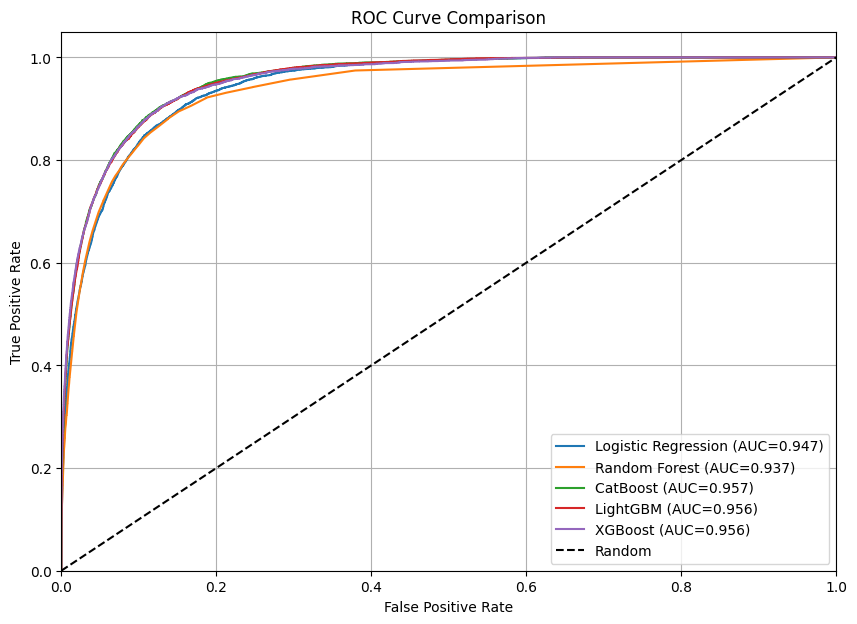

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

# --- Ajoute chaque modèle ici ---
fpr, tpr, _ = roc_curve(y_test, y_proba_logreg)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC={roc_auc_score(y_test, y_proba_logreg):.3f})')

fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr, tpr, label=f'Random Forest (AUC={roc_auc_score(y_test, y_proba_rf):.3f})')

fpr, tpr, _ = roc_curve(y_test, y_proba_cb)
plt.plot(fpr, tpr, label=f'CatBoost (AUC={roc_auc_score(y_test, y_proba_cb):.3f})')

fpr, tpr, _ = roc_curve(y_test, y_proba_lgb)
plt.plot(fpr, tpr, label=f'LightGBM (AUC={roc_auc_score(y_test, y_proba_lgb):.3f})')

fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
plt.plot(fpr, tpr, label=f'XGBoost (AUC={roc_auc_score(y_test, y_proba_xgb):.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid()
plt.show()


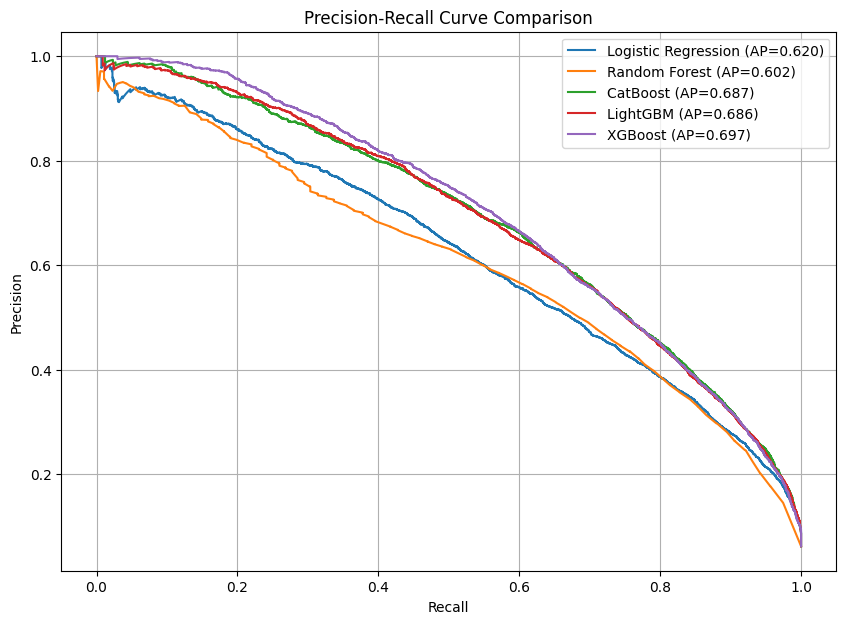

In [48]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 7))

# --- Ajoute chaque modèle ici ---
precision, recall, _ = precision_recall_curve(y_test, y_proba_logreg)
plt.plot(recall, precision, label=f'Logistic Regression (AP={average_precision_score(y_test, y_proba_logreg):.3f})')

precision, recall, _ = precision_recall_curve(y_test, y_proba_rf)
plt.plot(recall, precision, label=f'Random Forest (AP={average_precision_score(y_test, y_proba_rf):.3f})')

precision, recall, _ = precision_recall_curve(y_test, y_proba_cb)
plt.plot(recall, precision, label=f'CatBoost (AP={average_precision_score(y_test, y_proba_cb):.3f})')

precision, recall, _ = precision_recall_curve(y_test, y_proba_lgb)
plt.plot(recall, precision, label=f'LightGBM (AP={average_precision_score(y_test, y_proba_lgb):.3f})')

precision, recall, _ = precision_recall_curve(y_test, y_proba_xgb)
plt.plot(recall, precision, label=f'XGBoost (AP={average_precision_score(y_test, y_proba_xgb):.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc="upper right")
plt.grid()
plt.show()


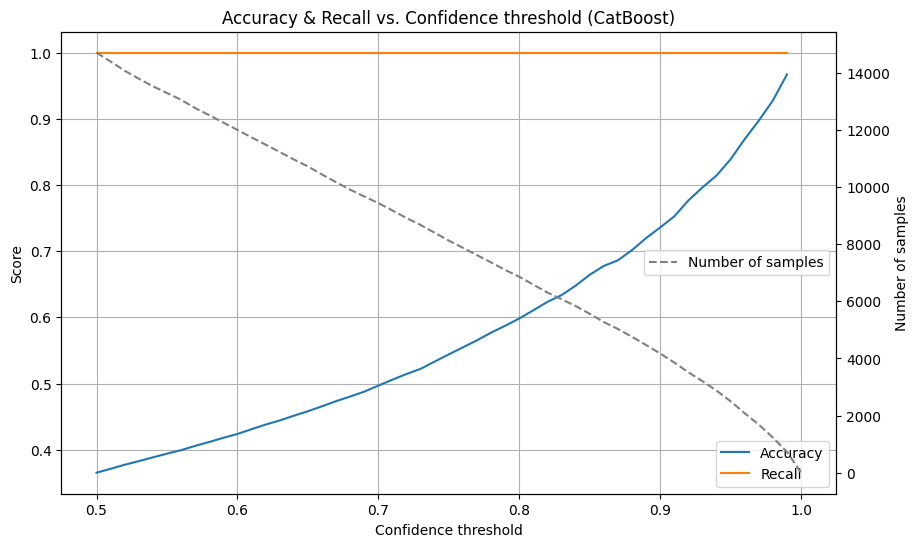

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score

# Probabilité de la classe 1 pour chaque observation
probas = y_proba_cb  # ou model_cb.predict_proba(X_test)[:,1]
y_pred = (probas > 0.5).astype(int)  # prédiction standard à 0.5

# On va tracer accuracy et recall en fonction du seuil de confiance
thresholds = np.arange(0.5, 1.01, 0.01)
accuracy_scores = []
recall_scores = []
supports = []

for thresh in thresholds:
    idx = np.where(probas >= thresh)[0]  # indices des cas où la proba >= seuil
    if len(idx) == 0:
        accuracy_scores.append(np.nan)
        recall_scores.append(np.nan)
        supports.append(0)
    else:
        y_true_high = y_test.iloc[idx] if hasattr(y_test, "iloc") else np.array(y_test)[idx]
        y_pred_high = y_pred[idx]
        accuracy_scores.append(accuracy_score(y_true_high, y_pred_high))
        recall_scores.append(recall_score(y_true_high, y_pred_high))
        supports.append(len(idx))

plt.figure(figsize=(10,6))
plt.plot(thresholds, accuracy_scores, label="Accuracy")
plt.plot(thresholds, recall_scores, label="Recall")
plt.xlabel('Confidence threshold')
plt.ylabel('Score')
plt.title('Accuracy & Recall vs. Confidence threshold (CatBoost)')
plt.legend()
plt.grid()
plt.twinx()
plt.plot(thresholds, supports, color='grey', linestyle='--', label='Number of samples')
plt.ylabel('Number of samples')
plt.legend(loc="center right")
plt.show()


### Else

In [46]:
##### GridSearchCV #####
"""
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

train_df['income_binary'] = train_df['income'].apply(lambda x: 1 if '50000+' in x else 0)

# Features et target
X = train_df.drop(columns=['income','income_binary'])  
y = train_df['income_binary']

# Supprimer les colonnes flag (indicateurs de valeurs manquantes)
#flag_cols = [col for col in X.columns if col.endswith('_is_missing')]
#X = X.drop(columns=flag_cols)

# Refaire le split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#--------------------------------------
# Redétecter les colonnes catégorielles
cat_features = X_train.select_dtypes(include='object').columns.tolist()

# Remplacer les NaN dans les colonnes catégorielles par une chaîne de caractères
for col in cat_features:
    X_train[col] = X_train[col].fillna('missing')
    X_val[col] = X_val[col].fillna('missing')
#--------------------------------------
 
# Redétecter les colonnes catégorielles
cat_features = X_train.select_dtypes(include='object').columns.tolist()

from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [300, 500, 800],
}

cbc = CatBoostClassifier(loss_function='Logloss', auto_class_weights='Balanced', eval_metric='AUC', verbose=0, random_seed=42)
grid = GridSearchCV(cbc, params, cv=3, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train, cat_features=cat_features)
print(grid.best_params_)""";

In [8]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

train_df['income_binary'] = train_df['income'].apply(lambda x: 1 if '50000+' in x else 0)

# Features et target
X = train_df.drop(columns=['income','income_binary'])  
y = train_df['income_binary']

# Supprimer les colonnes flag (indicateurs de valeurs manquantes)
#flag_cols = [col for col in X.columns if col.endswith('_is_missing')]
#X = X.drop(columns=flag_cols)

# Refaire le split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#--------------------------------------
# Redétecter les colonnes catégorielles
cat_features = X_train.select_dtypes(include='object').columns.tolist()

# Remplacer les NaN dans les colonnes catégorielles par une chaîne de caractères
for col in cat_features:
    X_train[col] = X_train[col].fillna('missing')
    X_val[col] = X_val[col].fillna('missing')
#--------------------------------------
 
# Redétecter les colonnes catégorielles
cat_features = X_train.select_dtypes(include='object').columns.tolist()

# Initialiser le modèle
model = CatBoostClassifier(
    use_best_model=True,
    learning_rate=0.03,
    depth=8,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=50,
    random_seed=42,
    auto_class_weights='Balanced'
)

# Entraîner avec les colonnes catégorielles spécifiées
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
    use_best_model=True
)

# Évaluation
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))


0:	test: 0.8999777	best: 0.8999777 (0)	total: 303ms	remaining: 5m 2s
50:	test: 0.9229791	best: 0.9229791 (50)	total: 5.78s	remaining: 1m 47s
100:	test: 0.9273530	best: 0.9273530 (100)	total: 11.5s	remaining: 1m 42s
150:	test: 0.9295632	best: 0.9295632 (150)	total: 17s	remaining: 1m 35s
200:	test: 0.9310108	best: 0.9310108 (200)	total: 22.6s	remaining: 1m 29s
250:	test: 0.9319591	best: 0.9319591 (250)	total: 28.2s	remaining: 1m 24s
300:	test: 0.9327355	best: 0.9327355 (300)	total: 34.2s	remaining: 1m 19s
350:	test: 0.9334114	best: 0.9334193 (349)	total: 40.1s	remaining: 1m 14s
400:	test: 0.9341278	best: 0.9341278 (400)	total: 45.9s	remaining: 1m 8s
450:	test: 0.9356909	best: 0.9356909 (450)	total: 53.2s	remaining: 1m 4s
500:	test: 0.9366110	best: 0.9366110 (500)	total: 1m	remaining: 60s
550:	test: 0.9374112	best: 0.9374112 (550)	total: 1m 7s	remaining: 54.6s
600:	test: 0.9378113	best: 0.9378113 (600)	total: 1m 13s	remaining: 48.8s
650:	test: 0.9381184	best: 0.9381184 (650)	total: 1m 20s

<Figure size 600x500 with 0 Axes>

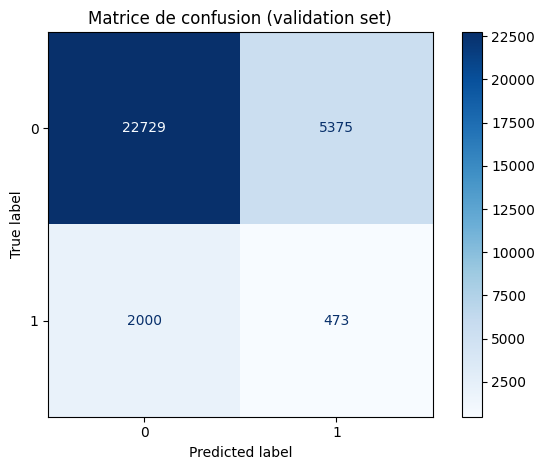

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prédictions
y_pred = model.predict(X_val)

# Matrice de confusion
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Affichage
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion (validation set)")
plt.tight_layout()
plt.show()


#### Further results

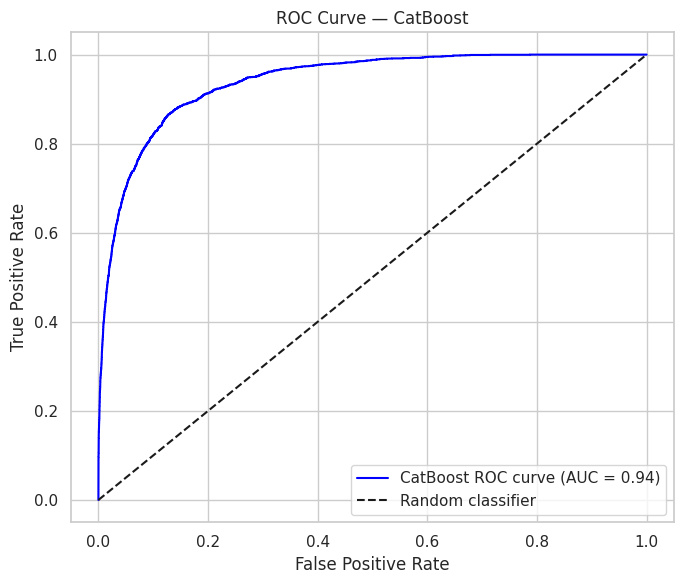

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prédiction des probabilités (classe 1 uniquement)
y_proba = model.predict_proba(X_val)[:, 1]

# Calcul des points de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

# Affichage
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f'CatBoost ROC curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — CatBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


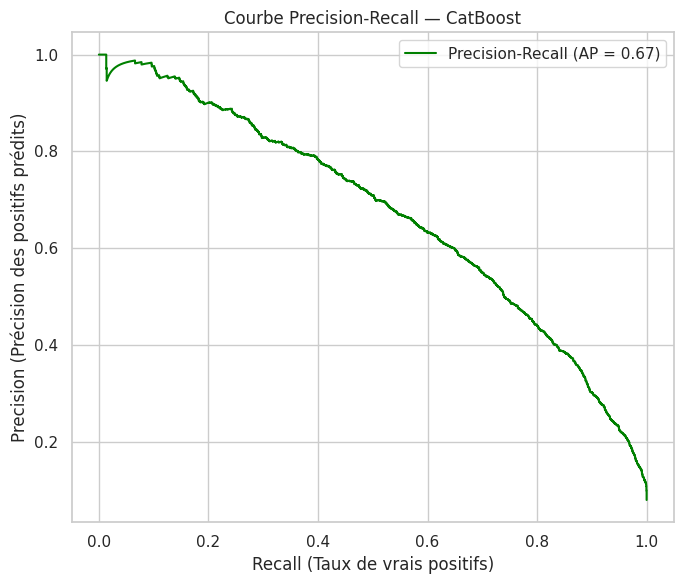

In [39]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Probabilités de classe 1 (revenu >50K)
y_scores = model.predict_proba(X_val)[:, 1]

# Courbe Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)
ap_score = average_precision_score(y_val, y_scores)

# Tracé
plt.figure(figsize=(7, 6))
plt.plot(recall, precision, label=f'Precision-Recall (AP = {ap_score:.2f})', color='green')
plt.xlabel('Recall (Taux de vrais positifs)')
plt.ylabel('Precision (Précision des positifs prédits)')
plt.title('Courbe Precision-Recall — CatBoost')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


#### SMOTE

Avant SMOTE : {0: 112411, 1: 9894}
Après SMOTE : {0: 112411, 1: 112411}
0:	test: 0.8773438	best: 0.8773438 (0)	total: 35.9ms	remaining: 17.9s
50:	test: 0.9035943	best: 0.9037214 (43)	total: 909ms	remaining: 8s
100:	test: 0.9072755	best: 0.9075767 (97)	total: 1.79s	remaining: 7.06s
150:	test: 0.9089189	best: 0.9093519 (142)	total: 2.79s	remaining: 6.45s
200:	test: 0.9100744	best: 0.9101224 (194)	total: 3.66s	remaining: 5.44s
250:	test: 0.9109430	best: 0.9109699 (249)	total: 4.54s	remaining: 4.5s
300:	test: 0.9120671	best: 0.9120671 (300)	total: 5.67s	remaining: 3.75s
350:	test: 0.9128477	best: 0.9128477 (350)	total: 6.56s	remaining: 2.78s
400:	test: 0.9133604	best: 0.9133683 (399)	total: 7.44s	remaining: 1.84s
450:	test: 0.9136703	best: 0.9137180 (448)	total: 8.34s	remaining: 906ms
499:	test: 0.9141564	best: 0.9141564 (499)	total: 9.22s	remaining: 0us

bestTest = 0.9141563932
bestIteration = 499

              precision    recall  f1-score   support

           0       0.97      0.92   

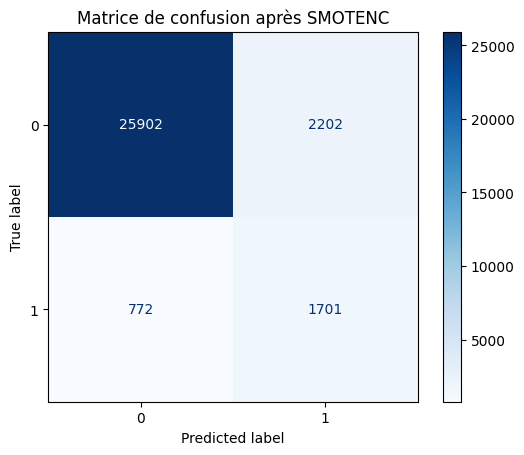

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTENC
from catboost import CatBoostClassifier

# ───────────────────────────────────────────────────────────────
# 1. Split initial
# ───────────────────────────────────────────────────────────────
X = train_df.drop(columns=['income', 'income_binary'])
y = train_df['income_binary']

# Supprimer les colonnes flag (indicateurs de valeurs manquantes)
flag_cols = [col for col in X.columns if col.endswith('_is_missing')]
X = X.drop(columns=flag_cols)

# On conserve la liste des colonnes catégorielles
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(exclude='object').columns.tolist()

# Split (stratifié)
X_train_raw, X_val_raw, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ───────────────────────────────────────────────────────────────
# 2. Encodage ordinal (obligatoire pour SMOTENC)
# ───────────────────────────────────────────────────────────────
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_enc = X_train_raw.copy()
X_val_enc   = X_val_raw.copy()

X_train_enc[cat_cols] = enc.fit_transform(X_train_raw[cat_cols])
X_val_enc[cat_cols]   = enc.transform(X_val_raw[cat_cols])

# ───────────────────────────────────────────────────────────────
# 3. SMOTENC (over-sampling de la classe minoritaire)
# ───────────────────────────────────────────────────────────────
# Indices des colonnes catégorielles dans l’array numpy
cat_indices = [X_train_enc.columns.get_loc(c) for c in cat_cols]

smote = SMOTENC(categorical_features=cat_indices, random_state=42)
X_res, y_res = smote.fit_resample(X_train_enc, y_train)

print("Avant SMOTE :", y_train.value_counts().to_dict())
print("Après SMOTE :", pd.Series(y_res).value_counts().to_dict())

# ───────────────────────────────────────────────────────────────
# 4. Entraînement CatBoost (sur données ré-équilibrées)
# ───────────────────────────────────────────────────────────────
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=50,
    random_seed=42,        # on laisse Balanced=off (déjà ré-équilibré)
)

# NOTE : on passe cat_features=[] car tout est déjà encodé numériquement
model.fit(
    X_res, y_res,
    eval_set=(X_val_enc, y_val),
    use_best_model=True
)

# ───────────────────────────────────────────────────────────────
# 5. Évaluation
# ───────────────────────────────────────────────────────────────
y_pred = model.predict(X_val_enc)
print(classification_report(y_val, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot(
    cmap='Blues', values_format='d')
plt.title("Matrice de confusion après SMOTENC")
plt.show()


#### Other models 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool

# ⚠️ Assure-toi que X et y soient déjà prêts (et éventuellement SMOTENC appliqué)
X = train_df.drop(columns=['income', 'income_binary'])
y = train_df['income_binary']
cat_features = X.select_dtypes(include='object').columns.tolist()

# Séparation des données
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Résultats stockés ici
results = {}

# 1. CatBoost
model_cb = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6,
                              loss_function='Logloss', eval_metric='AUC',
                              verbose=0, random_seed=42, auto_class_weights='Balanced')
model_cb.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_val, y_val), use_best_model=True)
pred_cb = model_cb.predict(X_val)
results['CatBoost'] = classification_report(y_val, pred_cb, output_dict=True)

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train.select_dtypes(exclude='object'), y_train)
pred_rf = rf.predict(X_val.select_dtypes(exclude='object'))
results['RandomForest'] = classification_report(y_val, pred_rf, output_dict=True)

# 3. XGBoost
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6,
                    scale_pos_weight=(y == 0).sum() / (y == 1).sum(), use_label_encoder=False,
                    eval_metric='logloss', random_state=42)
xgb.fit(X_train.select_dtypes(exclude='object'), y_train)
pred_xgb = xgb.predict(X_val.select_dtypes(exclude='object'))
results['XGBoost'] = classification_report(y_val, pred_xgb, output_dict=True)

# 4. LightGBM
lgbm = LGBMClassifier(n_estimators=200, learning_rate=0.05, class_weight='balanced', random_state=42)
lgbm.fit(X_train.select_dtypes(exclude='object'), y_train)
pred_lgbm = lgbm.predict(X_val.select_dtypes(exclude='object'))
results['LightGBM'] = classification_report(y_val, pred_lgbm, output_dict=True)

# 📊 Résumé des scores F1
df_results = pd.DataFrame({
    model: {
        'F1-score (class 0)': round(metrics['0']['f1-score'], 3),
        'F1-score (class 1)': round(metrics['1']['f1-score'], 3),
        'Precision (1)': round(metrics['1']['precision'], 3),
        'Recall (1)': round(metrics['1']['recall'], 3),
        'Accuracy': round(metrics['accuracy'], 3)
    }
    for model, metrics in results.items()
}).T

print(df_results)


/usr/local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [22:43:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 4666, number of negative: 57410
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 987
[LightGBM] [Info] Number of data points in the train set: 62076, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
              F1-score (class 0)  F1-score (class 1)  Precision (1)  \
CatBoost                   0.917               0.478          0.330   
RandomForest               0.963               0.439          0.565   
XGBoost                    0.907               0.443          0.301   
LightGBM                   0.909               0.450          0.306   

              Recall (1)  Accuracy  
CatBoost           0.872     0.857  
RandomForest    